# Step 1: Clean raw CSV files ‚Äî format and pad CAN data for model input (CAAE pre-processing)


In [ ]:
import pandas as pd
from pathlib import Path
import logging

from pathlib import Path
import logging
import pandas as pd

def clean_and_save_csv(csv_file: str) -> str:
    """
    ◊û◊†◊ß◊î ◊ß◊ï◊ë◊• CSV: ◊û◊°◊ô◊® ◊¢◊û◊ï◊ì◊™ ◊ê◊ô◊†◊ì◊ß◊°, ◊û◊§◊¶◊ú ◊ï◊û◊®◊§◊ì ◊ê◊™ ◊¢◊û◊ï◊ì◊™ ◊î-Data, ◊ï◊©◊ï◊û◊® ◊û◊ó◊ì◊©.
    Label ◊™◊û◊ô◊ì ◊™◊ï◊§◊ô◊¢ ◊ê◊ó◊®◊ô DATA[7].

    Args:
        csv_file (str): ◊î◊†◊™◊ô◊ë ◊ú◊ß◊ï◊ë◊• ◊î◊û◊ß◊ï◊®◊ô.

    Returns:
        str: ◊î◊†◊™◊ô◊ë ◊ú◊ß◊ï◊ë◊• ◊î◊ó◊ì◊© ◊©◊†◊©◊û◊®.
    """
    # ◊ß◊®◊ô◊ê◊î ◊¢◊ù ◊¢◊û◊ï◊ì◊î ◊ê◊ó◊™ ◊ú÷æData

    cols = ['Timestamp', 'CAN ID', 'DLC', 'Data', 'Label']
    df = pd.read_csv(csv_file, header=None, names=cols, low_memory=False)

    # ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊™ index

    # ◊î◊û◊®◊ï◊™ ◊ë◊°◊ô◊°◊ô◊ï◊™
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC'] = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'CAN ID'])

    # ◊†◊ô◊ß◊ï◊ô ◊¢◊®◊õ◊ô Data
    def process_data_field(raw):
        if pd.isna(raw): return ['00'] * 8
        raw = str(raw).replace(" ", "")  # ◊î◊°◊®◊™ ◊®◊ï◊ï◊ó◊ô◊ù
        bytes_list = [raw[i:i+2] for i in range(0, len(raw), 2)]
        while len(bytes_list) < 8:
            bytes_list.append("00")
        return bytes_list[:8]

    # ◊î◊ó◊ú◊™ ◊î◊§◊ô◊¶◊ï◊ú ◊ï◊î◊§◊ô◊®◊ï◊ß
    processed_data = df['Data'].apply(process_data_field)
    data_df = pd.DataFrame(processed_data.tolist(), columns=[f'DATA[{i}]' for i in range(8)])
    df.drop(columns=['Data'], inplace=True)

    # ◊¢◊ì◊õ◊ï◊ü DLC ◊ú-8 ◊ê◊ù ◊î◊ô◊î ◊§◊ó◊ï◊™
    df['DLC'] = 8

    # ◊ë◊†◊ô◊ô◊™ ◊î◊°◊ì◊® ◊î◊†◊õ◊ï◊ü ◊û◊ó◊ì◊©
    final_df = pd.concat([df[['Timestamp', 'CAN ID', 'DLC']].reset_index(drop=True),
                          data_df.reset_index(drop=True),
                          df[['Label']].reset_index(drop=True)], axis=1)

    # ◊©◊û◊ô◊®◊î
    out_file = Path(csv_file)
    final_df.to_csv(out_file, index=False)
    logging.info(f"[CLEAN] Saved cleaned file: {out_file}")
    return str(out_file)

# ◊®◊©◊ô◊û◊™ ◊©◊û◊ï◊™ ◊î◊ß◊ë◊¶◊ô◊ù ◊û◊™◊ï◊ö ◊î◊™◊û◊ï◊†◊î
csv_files = [
    "Attack_free_CHEVROLET_Spark_train.csv",
    "Attack_free_KIA_Soul_train.csv",
    "Flooding_CHEVROLET_Spark_train.csv",
    "Flooding_HYUNDAI_Sonata_train.csv",
    "Flooding_KIA_Soul_train.csv",
    "Fuzzy_CHEVROLET_Spark_train.csv",
    'Attack_free_HY_Sonata_train.csv',
    'Attack_free_KIA_Soul_train.csv',
    'Fuzzy_dataset_HY_Sonata_train.csv',
    'Fuzzy_dataset_KIA_Soul_train.csv',
    'Malfunction_1st_dataset_HY_Sonata_train.csv',
    'Malfunction_1st_dataset_KIA_Soul_train.csv',
    'Malfunction_2nd_HY_Sonata_train.csv',
    'Malfunction_2nd_KIA_Soul_train.csv',
    'Replay_dataset_HY_Sonata_train.csv',
    'Replay_dataset_KIA_Soul_train.csv'
]


# ◊†◊™◊ô◊ë ◊ú◊™◊ô◊ß◊ô◊ô◊î ◊î◊û◊õ◊ô◊ú◊î ◊ê◊™ ◊î◊ß◊ë◊¶◊ô◊ù

# ◊î◊§◊¢◊ú◊™ ◊î◊§◊ï◊†◊ß◊¶◊ô◊î ◊¢◊ú ◊õ◊ú ◊ß◊ï◊ë◊•
for fname in csv_files:
    try:
        cleaned_path = clean_and_save_csv(str(fname))
        print(f"[‚úì] Cleaned: {cleaned_path}")
    except Exception as e:
        print(f"[‚úó] Failed: {fname} ‚Äî {e}")


[‚úì] Cleaned: Attack_free_CHEVROLET_Spark_train.csv
[‚úì] Cleaned: Attack_free_KIA_Soul_train.csv
[‚úì] Cleaned: Flooding_CHEVROLET_Spark_train.csv
[‚úì] Cleaned: Flooding_HYUNDAI_Sonata_train.csv
[‚úì] Cleaned: Flooding_KIA_Soul_train.csv
[‚úì] Cleaned: Fuzzy_CHEVROLET_Spark_train.csv
[‚úì] Cleaned: Attack_free_HY_Sonata_train.csv
[‚úì] Cleaned: Attack_free_KIA_Soul_train.csv
[‚úì] Cleaned: Fuzzy_dataset_HY_Sonata_train.csv
[‚úì] Cleaned: Fuzzy_dataset_KIA_Soul_train.csv
[‚úì] Cleaned: Malfunction_1st_dataset_HY_Sonata_train.csv
[‚úì] Cleaned: Malfunction_1st_dataset_KIA_Soul_train.csv
[‚úì] Cleaned: Malfunction_2nd_HY_Sonata_train.csv
[‚úì] Cleaned: Malfunction_2nd_KIA_Soul_train.csv
[‚úì] Cleaned: Replay_dataset_HY_Sonata_train.csv
[‚úì] Cleaned: Replay_dataset_KIA_Soul_train.csv


THIS MODEL BUILD AS THE FIRST PROTOTYP MODEL OF AAE

THIS MODEL BUILD FOR FIND THE BEST HYPERPARMTER SEARCH

In [ ]:
# ‚úÖ ◊í◊®◊°◊î ◊û◊ú◊ê◊î ◊©◊ú ◊î◊§◊ô◊ô◊§◊ú◊ô◊ô◊ü ◊õ◊ï◊ú◊ú AAE + Keras Tuner ◊ú◊ê◊ì◊ë◊®◊°◊ô◊ê◊ú ◊ê◊ï◊ò◊ï◊ê◊ô◊†◊ß◊ï◊ì◊®

import os
import glob
import sys
import subprocess
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow.keras.layers import BatchNormalization, LayerNormalization, Dropout, LeakyReLU, Activation
# ◊î◊™◊ß◊†◊™ keras-tuner ◊ê◊ù ◊¶◊®◊ô◊ö
try:
    import keras_tuner as kt
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'keras-tuner'])
    import keras_tuner as kt

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# 1) CSV ‚Üí windows ‚Üí TFRecord (with file checks)
# ------------------------------------------------------------
datasets = ['DoS','Fuzzy','RPM','gear','parsed_dataset']
csv_map = {
    'DoS': 'DoS_dataset.csv',
    'Fuzzy': 'Fuzzy_dataset.csv',
    'RPM': 'RPM_dataset.csv',
    'gear': 'gear_dataset.csv',
    'parsed_dataset': 'parsed_dataset.csv'
}
FEATURE_DIM = 29*29*2
N_LABELS    = 2
BATCH       = 128
EPOCHS      = 30

# helper functions for preprocessing
def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data'+str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid),16))[2:].zfill(29)
        return np.array(list(map(int,b)),dtype=np.uint8)
    except:
        return np.zeros(29,dtype=np.uint8)

def hex_to_int(x):
    try: return int(str(x).strip(),16)
    except: return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp','canID','DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp','canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag'] = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')
    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values
    win = 29; N = len(bits_all)//win
    bits = bits_all[:N*win].reshape(N,win,29)
    data = data_bytes[:N*win].reshape(N,win,8)
    flags= flags_all[:N*win].reshape(N,win)
    rows=[]
    for i in range(N):
        id_img = bits[i].astype(np.uint8)
        last_b = data[i,-1,:]
        b8 = np.unpackbits(last_b,axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32),(29,29), interpolation=cv2.INTER_NEAREST)>0.5
        two_ch = np.stack([id_img, data_img.astype(np.uint8)],axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl = int(flags[i].any())
        rows.append((feat_int,lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7*len(rows)); nvl = int(0.15*len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph,ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as w:
            for feat,lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                w.write(ex.SerializeToString())

# create/check TFRecords
expected=[]
for a in datasets:
    for ph in ('train','val','test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a!='parsed_dataset': expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src=csv_map[a]
        if not os.path.exists(src): print(f"[WARN] {src} not found")
        else:
            rows=preprocess_windows(src)
            normals=[r for r in rows if r[1]==0]
            attacks=[r for r in rows if r[1]==1]
            write_tfrecord(normals,f"Normal_{a}")
            if attacks: write_tfrecord(attacks,a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat=tf.io.parse_single_example(proto,{
        'features':tf.io.FixedLenFeature([FEATURE_DIM],tf.int64),
        'label':   tf.io.FixedLenFeature([1],tf.int64)
    })
    x=tf.cast(feat['features'],tf.float32)
    y=tf.one_hot(tf.cast(feat['label'][0],tf.int32),N_LABELS)
    return x,y

def make_datasets():
    print('[PIPE] Building datasets...')
    train_files=glob.glob('Normal_*_train.tfrecord')
    val_files  =glob.glob('Normal_*_val.tfrecord')
    ds_train=(tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
              .map(parse_feat, tf.data.AUTOTUNE)
              .map(lambda x,y:(x+tf.random.normal(tf.shape(x),0,0.01),x,y), tf.data.AUTOTUNE)
              .shuffle(10000).batch(BATCH).prefetch(tf.data.AUTOTUNE))
    ds_val  =(tf.data.TFRecordDataset(val_files, num_parallel_reads=tf.data.AUTOTUNE)
              .map(parse_feat, tf.data.AUTOTUNE)
              .map(lambda x,y:(x,x,y), tf.data.AUTOTUNE)
              .batch(BATCH).prefetch(tf.data.AUTOTUNE))
    print(f'[PIPE] Train files: {len(train_files)}, Val files: {len(val_files)}')
    return ds_train, ds_val

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self, n_l1, n_l2, latent_dim, lam_gp, n_layers=2, dropout_rate=0.2, activation='relu', norm_type='batch'):
        super().__init__()
        self.norm_type = norm_type
        self.activation = activation
        self.dropout_rate = dropout_rate
        # Encoder
        self.enc_layers = []
        self.enc_norms = []
        self.enc_drops = []
        for i in range(n_layers):
            units = n_l1 if i == 0 else n_l2
            self.enc_layers.append(tf.keras.layers.Dense(units))
            if norm_type == 'batch':
                self.enc_norms.append(BatchNormalization())
            else:
                self.enc_norms.append(LayerNormalization())
            self.enc_drops.append(Dropout(dropout_rate))
        self.ez = tf.keras.layers.Dense(latent_dim)
        self.ey = tf.keras.layers.Dense(N_LABELS)
        # Decoder
        self.dec_layers = []
        self.dec_norms = []
        self.dec_drops = []
        for i in range(n_layers):
            units = n_l2 if i == 0 else n_l1
            self.dec_layers.append(tf.keras.layers.Dense(units))
            if norm_type == 'batch':
                self.dec_norms.append(BatchNormalization())
            else:
                self.dec_norms.append(LayerNormalization())
            self.dec_drops.append(Dropout(dropout_rate))
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')
        # Discriminators
        self.dz1 = tf.keras.layers.Dense(n_l1)
        self.dz2 = tf.keras.layers.Dense(n_l2)
        self.dzout = tf.keras.layers.Dense(1)
        self.dy1 = tf.keras.layers.Dense(n_l1)
        self.dy2 = tf.keras.layers.Dense(n_l2)
        self.dyout = tf.keras.layers.Dense(1)
        self.lam_gp = lam_gp
        self.input_norm = LayerNormalization()
    def _apply_activation(self, x):
        if self.activation == 'leaky_relu':
            return LeakyReLU()(x)
        elif self.activation == 'elu':
            return tf.keras.activations.elu(x)
        else:
            return tf.keras.activations.relu(x)
    def encode(self, x):
        h = self.input_norm(x)
        for l, n, d in zip(self.enc_layers, self.enc_norms, self.enc_drops):
            h = l(h)
            h = n(h)
            h = self._apply_activation(h)
            h = d(h)
        z = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits
    def decode(self, z, y):
        h = tf.concat([z, y], 1)
        for l, n, d in zip(self.dec_layers, self.dec_norms, self.dec_drops):
            h = l(h)
            h = n(h)
            h = self._apply_activation(h)
            h = d(h)
        return self.dout(h)
    def discriminate_z(self, z):
        h = self._apply_activation(self.dz1(z))
        h = self._apply_activation(self.dz2(h))
        return self.dzout(h)
    def discriminate_y(self, y):
        h = self._apply_activation(self.dy1(y))
        h = self._apply_activation(self.dy2(h))
        return self.dyout(h)
    def gradient_penalty(self, f, real, fake):
        a = tf.random.uniform([real.shape[0], 1], 0, 1)
        i = real + a * (fake - real)
        with tf.GradientTape() as t:
            t.watch(i)
            p = f(i)
        g = t.gradient(p, i)
        s = tf.sqrt(tf.reduce_sum(tf.square(g), axis=1) + 1e-8)
        return tf.reduce_mean((s - 1) ** 2)

class AAEHyperModel(kt.HyperModel):
    def build(self, hp):
        n_layers = hp.Int('n_layers', 2, 4)
        dropout_rate = hp.Float('dropout', 0.0, 0.5, step=0.1)
        activation = hp.Choice('activation', ['relu', 'elu', 'leaky_relu'])
        norm_type = hp.Choice('norm_type', ['batch', 'layer'])
        return AAE(
            hp.Int('n_l1', 256, 1024, 256),
            hp.Int('n_l2', 256, 1024, 256),
            hp.Int('latent_dim', 16, 128, 16),
            hp.Choice('lambda_gp', [1.0, 5.0, 10.0, 20.0]),
            n_layers=n_layers,
            dropout_rate=dropout_rate,
            activation=activation,
            norm_type=norm_type
        )
    def fit(self, hp, model, ds_train, ds_val, epochs, steps_per_epoch, **kwargs):
        print('[TUNER] fit start')
        opt_ae = tf.keras.optimizers.Adam(hp.Choice('lr_ae', [1e-3, 5e-4, 1e-4]))
        opt_dz = tf.keras.optimizers.Adam(hp.Choice('lr_dz', [1e-4, 5e-5]))
        opt_dy = tf.keras.optimizers.Adam(hp.Choice('lr_dy', [1e-4, 5e-5]))
        opt_g = tf.keras.optimizers.Adam(hp.Choice('lr_g', [1e-4, 5e-5]))
        mse = tf.keras.losses.MeanSquaredError()
        ce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
        early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        for e in range(epochs):
            print(f'[TUNER] Epoch {e+1}/{epochs}')
            for step, (xn, xc, y) in enumerate(ds_train.take(steps_per_epoch)):
                # AE
                with tf.GradientTape() as t:
                    z, yp, logits = model.encode(xn)
                    xr = model.decode(z, yp)
                    loss_re = mse(xc, xr)
                vars_ae = []
                for l in model.enc_layers + model.dec_layers:
                    vars_ae += l.trainable_variables
                vars_ae += model.ez.trainable_variables + model.ey.trainable_variables + model.dout.trainable_variables
                opt_ae.apply_gradients(zip(t.gradient(loss_re, vars_ae), vars_ae))
                # D_z
                with tf.GradientTape() as t:
                    zr = tf.random.normal([xn.shape[0], model.ez.units])
                    dzr, dzf = model.discriminate_z(zr), model.discriminate_z(z)
                    loss_dz = tf.reduce_mean(dzf) - tf.reduce_mean(dzr) + model.lam_gp * model.gradient_penalty(model.discriminate_z, zr, z)
                vars_dz = model.dz1.trainable_variables + model.dz2.trainable_variables + model.dzout.trainable_variables
                opt_dz.apply_gradients(zip(t.gradient(loss_dz, vars_dz), vars_dz))
                # D_y
                with tf.GradientTape() as t:
                    dyr, dyf = model.discriminate_y(y), model.discriminate_y(yp)
                    loss_dy = tf.reduce_mean(dyf) - tf.reduce_mean(dyr) + model.lam_gp * model.gradient_penalty(model.discriminate_y, y, yp)
                vars_dy = model.dy1.trainable_variables + model.dy2.trainable_variables + model.dyout.trainable_variables
                opt_dy.apply_gradients(zip(t.gradient(loss_dy, vars_dy), vars_dy))
                # G
                with tf.GradientTape() as t:
                    zf = model.discriminate_z(model.encode(xc)[0])
                    yf = model.discriminate_y(model.encode(xc)[1])
                    loss_g = -tf.reduce_mean(zf) - tf.reduce_mean(yf) + ce(y, logits)
                vars_g = []
                for l in model.enc_layers:
                    vars_g += l.trainable_variables
                vars_g += model.ez.trainable_variables + model.ey.trainable_variables
                opt_g.apply_gradients(zip(t.gradient(loss_g, vars_g), vars_g))
        vals = []
        for xv, xc, _ in ds_val:
            z, y, _ = model.encode(xv)
            xr = model.decode(z, y)
            vals.append(mse(xc, xr).numpy())
        avg = np.mean(vals)
        print(f'[TUNER] Val MSE: {avg:.4f}')
        return avg

# ------------------------------------------------------------
# 5) Hyperparameter search
# ------------------------------------------------------------
ds_train,ds_val=make_datasets()
steps=sum(1 for _ in tf.data.TFRecordDataset(glob.glob('Normal_*_train.tfrecord')))//BATCH
hypermodel=AAEHyperModel()
tuner=kt.RandomSearch(hypermodel,objective=kt.Objective('val_loss','min'),max_trials=10,directory='aae_adv_tuner',project_name='adv_aae')
print('[TUNER] Searching...')
tuner.search(ds_train=ds_train,ds_val=ds_val,epochs=5,steps_per_epoch=steps)
best_hp=tuner.get_best_hyperparameters()[0]
print('[TUNER] Best HP:',best_hp.values)

# ------------------------------------------------------------
# 6) Train final with best HP
# ------------------------------------------------------------
print('[TRAIN] Final training...')
best_model=hypermodel.build(best_hp)
ds_train,ds_val=make_datasets()
_ = AAEHyperModel().fit(best_hp,best_model,ds_train,ds_val,EPOCHS,steps)

# ------------------------------------------------------------
# 7) Save and evaluate
# ------------------------------------------------------------
from tensorflow.keras.layers import Input,Activation,Concatenate
from tensorflow.keras.models import Model
print('[SAVE] Saving encoder & decoder')
enc_in=Input((FEATURE_DIM,));h=best_model.e2(best_model.e1(enc_in));z=best_model.ez(h);y=Activation('softmax')(best_model.ey(h))
enc_model=Model(enc_in,[z,y],name='aae_encoder')
z_in=Input((best_model.ez.units,));y_in=Input((N_LABELS,));merged=Concatenate()([z_in,y_in]);h=best_model.d2(best_model.d1(merged));out=best_model.dout(h)
dec_model=Model([z_in,y_in],out,name='aae_decoder')
enc_model.save('aae_encoder.keras');dec_model.save('aae_decoder.keras')
print('[SAVE] Models saved')
errs,ys=[],[]
for fn in glob.glob('*_test.tfrecord'):
    label=0 if fn.startswith('Normal_') else 1
    for x,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(256):
        z_p,y_p=enc_model(x);x_r=dec_model([z_p,y_p]);e=tf.reduce_mean((x-x_r)**2,1).numpy()
        errs.append(e);ys.append(np.full(e.shape,label))
errs,ys=np.concatenate(errs),np.concatenate(ys)
fpr,tpr,ths=roc_curve(ys,errs);roc=auc(fpr,tpr);opt_i=np.argmax(tpr-fpr);opt_t=ths[opt_i]
print(f'ROC AUC:{roc:.4f} thr:{opt_t:.6f} TPR:{tpr[opt_i]:.3f} FPR:{fpr[opt_i]:.3f}')
print('CM:',confusion_matrix(ys,(errs>opt_t).astype(int)))
print(classification_report(ys,(errs>opt_t).astype(int),target_names=['Normal','Attack']))


Trial 10 Complete [00h 51m 29s]
val_loss: 0.017599908635020256

Best val_loss So Far: 0.01379714347422123
Total elapsed time: 08h 21m 40s
[TUNER] Best HP: {'n_layers': 2, 'dropout': 0.2, 'activation': 'elu', 'norm_type': 'layer', 'n_l1': 1024, 'n_l2': 768, 'latent_dim': 64, 'lambda_gp': 10.0, 'lr_ae': 0.0005, 'lr_dz': 0.0001, 'lr_dy': 0.0001, 'lr_g': 5e-05}
[TRAIN] Final training...
[PIPE] Building datasets...
[PIPE] Train files: 5, Val files: 5
[TUNER] fit start
[TUNER] Epoch 1/30
[TUNER] Epoch 2/30
[TUNER] Epoch 3/30
[TUNER] Epoch 4/30
[TUNER] Epoch 5/30
[TUNER] Epoch 6/30
[TUNER] Epoch 7/30


# =======================================================================================
# üõ°Ô∏è CAN Bus Intrusion Detection using Tuned Adversarial Autoencoder (AAE)
# =======================================================================================
# This script implements a full pipeline for detecting anomalies in CAN bus traffic
# using a carefully tuned Adversarial Autoencoder (AAE) model.
#
# üí° Features:
# - Converts CAN messages into 2-channel (ID + Data) pseudo-images of shape 29x29x2
# - Trains an AAE model to learn compressed representations (z) and categorical labels (y)
# - Detects anomalies via reconstruction error on test sets
# - Uses both class and latent discriminators with gradient penalty for adversarial training
#
# üîß Tuned Hyperparameters (post-optimization):
# - Latent dimension (z):        64
# - Encoder/Decoder layers:      [1024, 768]
# - Activation function:         ELU
# - Dropout:                     0.2
# - Normalization:               LayerNorm
# - Œª (gradient penalty):        10.0
#
# üöÄ Optimizer Learning Rates:
# - Autoencoder (LR_AE):         0.0005
# - Discriminator_z (LR_DZ):     0.0001
# - Discriminator_y (LR_DY):     0.0001
# - Generator (LR_G):            0.00005
#
# üìä Final Evaluation:
# - ROC AUC:                     ~[filled at runtime]
# - Optimal Threshold:           ~[filled at runtime]
# - Metrics:                     Confusion matrix and classification report
#
# After tuning, this configuration showed improved anomaly detection performance
# across multiple CAN attack scenarios (DoS, Fuzzy, RPM, Gear).
# =======================================================================================

[RESULT] ROC AUC: 0.9820, Thr: 0.015617, TPR: 0.948, FPR: 0.058
[RESULT] Confusion Matrix:
[[39695  2427]
 [ 1208 21783]]
[RESULT] Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.94      0.96     42122
      Attack       0.90      0.95      0.92     22991
    accuracy                           0.94     65113
   macro avg       0.94      0.94      0.94     65113
weighted avg       0.95      0.94      0.94     65113

Tuend aae

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = ['DoS', 'Fuzzy', 'RPM', 'gear', 'parsed_dataset']
csv_map = {
    'DoS': 'DoS_dataset.csv',
    'Fuzzy': 'Fuzzy_dataset.csv',
    'RPM': 'RPM_dataset.csv',
    'gear': 'gear_dataset.csv',
    'parsed_dataset': 'parsed_dataset.csv'
}

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# Create/check TFRecords
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
print(confusion_matrix(ys, (errs > opt_thr).astype(int)))
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))


[DATA] TFRecords missing, preprocessing...
[DATA] Processing DoS_dataset.csv
[DATA] Processing Fuzzy_dataset.csv
[DATA] Processing RPM_dataset.csv
[DATA] Processing gear_dataset.csv
[DATA] Processing parsed_dataset.csv
[PIPE] Total records: 196541, steps/epoch: 1535
[TRAIN] Epoch 1/30
 step 0/1535 | recon=0.2733 dz=1.9218 dy=5.3378 gen=-1.4722
 step 100/1535 | recon=0.0570 dz=-4.2550 dy=-0.0035 gen=1.6584
 step 200/1535 | recon=0.0394 dz=-2.3828 dy=-0.0020 gen=-1.0089
 step 300/1535 | recon=0.0295 dz=-1.5527 dy=-0.0009 gen=-2.7389
 step 400/1535 | recon=0.0288 dz=-1.2230 dy=-0.0007 gen=-3.7749
 step 500/1535 | recon=0.0255 dz=-0.8081 dy=-0.0005 gen=-4.1547
 step 600/1535 | recon=0.0260 dz=-0.7109 dy=-0.0006 gen=-3.8181
 step 700/1535 | recon=0.0245 dz=-0.7931 dy=-0.0004 gen=-3.8004
 step 800/1535 | recon=0.0232 dz=-0.7230 dy=-0.0006 gen=-3.8912
 step 900/1535 | recon=0.0218 dz=-0.7263 dy=-0.0004 gen=-3.9559
 step 1000/1535 | recon=0.0222 dz=-0.7663 dy=-0.0008 gen=-4.0987
 step 1100/153

AAE second sim
data swt number 2 small size of data set





In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import csv

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = [
    'Attack_free_CHEVROLET_Spark_train',
    'Attack_free_HYUNDAI_Sonata_train',
    'Attack_free_KIA_Soul_train',
    'Flooding_CHEVROLET_Spark_train',
    'Flooding_HYUNDAI_Sonata_train',
    'Flooding_KIA_Soul_train',
    'Fuzzy_CHEVROLET_Spark_train',
    'Fuzzy_HYUNDAI_Sonata_train',
    'Fuzzy_KIA_Soul_train',
    'Malfunction_CHEVROLET_Spark_train',
    'Malfunction_HYUNDAI_Sonata_train',
    'Malfunction_KIA_Soul_train',
    'Replay_dataset_HY_Sonata_train',
    'Replay_dataset_KIA_Soul_train'
]

csv_map = {d: d + '.csv' for d in datasets}

def fix_attack_free_csv(path):
    fixed_rows = []
    with open(path, 'r') as infile:
        reader = csv.reader(infile)
        for row in reader:
            if not row or row[0] == "Timestamp":
                continue
            timestamp = row[0]
            can_id    = row[1]
            dlc       = int(row[2])
            raw_data  = row[3].strip().split()
            raw_data += ['00'] * (8 - len(raw_data)) if len(raw_data) < 8 else []
            raw_data = raw_data[:8]
            fixed_row = [timestamp, can_id, dlc] + raw_data + ['R']
            fixed_rows.append(fixed_row)
    with open(path, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(["Timestamp", "CAN ID", "DLC"] + [f"DATA[{i}]" for i in range(8)] + ["Label"])
        writer.writerows(fixed_rows)

def fix_attack_csv(path):
    fixed_rows = []
    with open(path, 'r') as infile:
        reader = csv.reader(infile)
        for row in reader:
            if not row or row[0] == "Timestamp":
                continue
            timestamp = row[0]
            can_id    = row[1]
            dlc       = int(row[2])
            raw_data  = row[3].strip().split()
            raw_data += ['00'] * (8 - len(raw_data)) if len(raw_data) < 8 else []
            raw_data = raw_data[:8]
            rest = row[4:] if len(row) > 4 else []
            fixed_row = [timestamp, can_id, dlc] + raw_data + rest
            fixed_rows.append(fixed_row)
    with open(path, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        header = ["Timestamp", "CAN ID", "DLC"] + [f"DATA[{i}]" for i in range(8)]
        if len(fixed_rows[0]) == 12:
            header.append("Label")
        writer.writerow(header)
        writer.writerows(fixed_rows)

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# ------------------------------------------------------------
# 1.5) Fix & preprocess CSV files
# ------------------------------------------------------------
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")

if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            if "attack_free" in src.lower():
                fix_attack_free_csv(src)
            else:
                fix_attack_csv(src)

            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")


# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
print(confusion_matrix(ys, (errs > opt_thr).astype(int)))
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))


[DATA] TFRecords missing, preprocessing...
[DATA] Processing Attack_free_CHEVROLET_Spark_train.csv
[DATA] Processing Attack_free_HYUNDAI_Sonata_train.csv
[DATA] Processing Attack_free_KIA_Soul_train.csv
[DATA] Processing Flooding_CHEVROLET_Spark_train.csv
[DATA] Processing Flooding_HYUNDAI_Sonata_train.csv
[DATA] Processing Flooding_KIA_Soul_train.csv
[DATA] Processing Fuzzy_CHEVROLET_Spark_train.csv
[DATA] Processing Fuzzy_HYUNDAI_Sonata_train.csv
[DATA] Processing Fuzzy_KIA_Soul_train.csv
[DATA] Processing Malfunction_CHEVROLET_Spark_train.csv
[DATA] Processing Malfunction_HYUNDAI_Sonata_train.csv
[DATA] Processing Malfunction_KIA_Soul_train.csv
[WARN] Replay_dataset_HY_Sonata_train.csv not found
[WARN] Replay_dataset_KIA_Soul_train.csv not found
[PIPE] Total records: 23578, steps/epoch: 184
[TRAIN] Epoch 1/30
 step 0/184 | recon=0.2737 dz=3.0691 dy=1.8532 gen=0.5951
 step 100/184 | recon=0.0628 dz=-3.7954 dy=-0.0054 gen=5.0743
[TRAIN] Epoch 2/30
 step 0/184 | recon=0.0440 dz=-3.0442

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report


# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = [
    "File_1_cleaned_Final.csv",
    "File_2_cleaned_Final.csv",
    "File_3_cleaned_Final.csv",
    "File_4_cleaned_Final.csv",
    "File_7_cleaned_Final.csv",
    "File_8_cleaned_Final.csv",
    "File_9_cleaned_Final.csv"
]
csv_map = {
    'File_1_cleaned_Final.csv': 'File_1_cleaned_Final.csv',
    'File_2_cleaned_Final.csv': 'File_2_cleaned_Final.csv',
    'File_3_cleaned_Final.csv': 'File_3_cleaned_Final.csv',
    'File_4_cleaned_Final.csv': 'File_4_cleaned_Final.csv',
    'File_7_cleaned_Final.csv': 'File_7_cleaned_Final.csv',
    'File_8_cleaned_Final.csv': 'File_8_cleaned_Final.csv',
    'File_9_cleaned_Final.csv': 'File_9_cleaned_Final.csv'
}

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# Create/check TFRecords
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
print(confusion_matrix(ys, (errs > opt_thr).astype(int)))
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))
# ------------------------------------------------------------
# 10) Plotting
# ------------------------------------------------------------
# -- Reconstruction loss curves
plt.figure(); plt.plot(re_hist,label='Train'); plt.plot(val_hist,label='Val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Reconstruction Loss'); plt.legend(); plt.show()

# -- Adversarial losses
plt.figure(); plt.plot(dz_hist,label='Disc-z'); plt.plot(dy_hist,label='Disc-y'); plt.plot(g_hist,label='Gen')
plt.xlabel('Epoch'); plt.ylabel('Wasserstein'); plt.title('Adversarial Losses'); plt.legend(); plt.show()

# -- ROC curve
plt.figure(); plt.plot(fpr,tpr,label=f'AUC={roc_auc:.3f}'); plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend(); plt.show()

# -- Confusion-matrix heat-map
plt.figure(); plt.imshow(cm,cmap=plt.cm.Blues); plt.title('Confusion Matrix'); plt.colorbar()
ticks = np.arange(2); classes=['Normal','Attack']
plt.xticks(ticks,classes,rotation=45); plt.yticks(ticks,classes)
th = cm.max()/2
for i,j in itertools.product(range(2),range(2)):
    plt.text(j,i,cm[i,j],ha='center',color='white' if cm[i,j]>th else 'black')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.tight_layout(); plt.show()

# -- Error distributions
plt.figure()
plt.hist(errs[ys==0],bins=50,alpha=.5,label='Normal')
plt.hist(errs[ys==1],bins=50,alpha=.5,label='Attack')
plt.xlabel('Reconstruction error'); plt.ylabel('Count')
plt.title('Error Distribution'); plt.legend(); plt.show()


[DATA] TFRecords missing, preprocessing...
[DATA] Processing File_1_cleaned_Final.csv
[DATA] Processing File_2_cleaned_Final.csv
[DATA] Processing File_3_cleaned_Final.csv
[DATA] Processing File_4_cleaned_Final.csv
[DATA] Processing File_7_cleaned_Final.csv
[DATA] Processing File_8_cleaned_Final.csv
[DATA] Processing File_9_cleaned_Final.csv
[PIPE] Total records: 4234, steps/epoch: 33
[TRAIN] Epoch 1/30
 step 0/33 | recon=0.2781 dz=1.6312 dy=9.1327 gen=0.3308
[TRAIN] Epoch 2/30
 step 0/33 | recon=0.1015 dz=-5.1057 dy=0.2813 gen=5.7265
[TRAIN] Epoch 3/30
 step 0/33 | recon=0.0687 dz=-4.1639 dy=0.0038 gen=2.7693
[TRAIN] Epoch 4/30
 step 0/33 | recon=0.0564 dz=-3.6406 dy=-0.0019 gen=1.8141
[TRAIN] Epoch 5/30
 step 0/33 | recon=0.0502 dz=-3.3059 dy=-0.0013 gen=0.9279
[TRAIN] Epoch 6/30
 step 0/33 | recon=0.0420 dz=-3.1168 dy=-0.0016 gen=0.8052
[TRAIN] Epoch 7/30
 step 0/33 | recon=0.0373 dz=-3.0832 dy=-0.0012 gen=0.3695
[TRAIN] Epoch 8/30
 step 0/33 | recon=0.0357 dz=-2.5220 dy=-0.0012 gen

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from google.colab import drive
drive.mount('/content/drive')

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = ['File_1','File_2','File_3','File_4','File_5','File_6','File_7','File_8' ]
csv_map = {
    'File_1': 'File_1.csv',
    'File_2': 'File_2.csv',
    'File_3': 'File_3.csv',
    'File_4': 'File_4.csv',
    'File_5': 'File_5.csv',
    'File_6': 'File_6.csv',
    'File_7': 'File_7.csv',
    'File_8': 'File_8.csv'
}

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# Create/check TFRecords
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
print(confusion_matrix(ys, (errs > opt_thr).astype(int)))
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))


third dataset -Medium size of samples

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from google.colab import drive
drive.mount('/content/drive')

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = ['File_1','File_2','File_3','File_4','File_5','File_6','File_7','File_8' ]
csv_map = {
    'File_1': 'File_1.csv',
    'File_2': 'File_2.csv',
    'File_3': 'File_3.csv',
    'File_4': 'File_4.csv',
    'File_5': 'File_5.csv',
    'File_6': 'File_6.csv',
    'File_7': 'File_7.csv',
    'File_8': 'File_8.csv'
}

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# Create/check TFRecords
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
print(confusion_matrix(ys, (errs > opt_thr).astype(int)))
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))


data set 4 very large data set

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = [,'File_1','File_2','File_3','File_4','File_5','File_6','File_7','File_8']
csv_map = {

    'File_1': 'File_1.csv',
    'File_2': 'File_2.csv',
    'File_3': 'File_3.csv',
    'File_4': 'File_4.csv',
    'File_5': 'File_5.csv',
    'File_6': 'File_6.csv',
    'File_7': 'File_7.csv',
    'File_8': 'File_8.csv'
}

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# Create/check TFRecords
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
print(confusion_matrix(ys, (errs > opt_thr).astype(int)))
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))


[DATA] TFRecords missing, preprocessing...
[DATA] Processing DoS_dataset.csv
[DATA] Processing Fuzzy_dataset.csv
[DATA] Processing RPM_dataset.csv
[DATA] Processing gear_dataset.csv
[DATA] Processing parsed_dataset.csv
[DATA] Processing File_1.csv
[DATA] Processing File_2.csv
[DATA] Processing File_3.csv
[DATA] Processing File_4.csv
[DATA] Processing File_5.csv
[DATA] Processing File_6.csv
[DATA] Processing File_7.csv
[DATA] Processing File_8.csv
[PIPE] Total records: 253631, steps/epoch: 1981
[TRAIN] Epoch 1/30
 step 0/1981 | recon=0.2733 dz=4.3593 dy=4.8458 gen=0.4717
 step 100/1981 | recon=0.0640 dz=-4.1722 dy=-0.0117 gen=6.2472
 step 200/1981 | recon=0.0413 dz=-2.7700 dy=-0.0060 gen=3.6004
 step 300/1981 | recon=0.0349 dz=-1.4208 dy=-0.0027 gen=1.3232
 step 400/1981 | recon=0.0306 dz=-1.0711 dy=-0.0028 gen=0.0371
 step 500/1981 | recon=0.0282 dz=-0.9534 dy=-0.0027 gen=-0.2749
 step 600/1981 | recon=0.0279 dz=-0.5286 dy=-0.0020 gen=-0.3724
 step 700/1981 | recon=0.0252 dz=-0.8746 dy

[DATA] TFRecords missing, preprocessing...
[DATA] Processing DoS_dataset.csv
[DATA] Processing Fuzzy_dataset.csv
[DATA] Processing RPM_dataset.csv
[DATA] Processing gear_dataset.csv
[DATA] Processing parsed_dataset.csv
[PIPE] Total records: 196541, steps/epoch: 1535
[TRAIN] Epoch 1/30
 step 0/1535 | recon=0.2770 dz=3.2457 dy=3.9107 gen=0.5375
 step 100/1535 | recon=0.0522 dz=-5.5579 dy=-0.0046 gen=6.2004
 step 200/1535 | recon=0.0360 dz=-3.2766 dy=-0.0045 gen=3.1140
 step 300/1535 | recon=0.0288 dz=-2.0449 dy=-0.0013 gen=0.5553
 step 400/1535 | recon=0.0248 dz=-1.3391 dy=-0.0010 gen=-0.6564
 step 500/1535 | recon=0.0231 dz=-0.7353 dy=-0.0007 gen=-1.0535
 step 600/1535 | recon=0.0220 dz=-0.7756 dy=-0.0008 gen=-0.8366
 step 700/1535 | recon=0.0215 dz=-0.7282 dy=-0.0011 gen=-0.7689
 step 800/1535 | recon=0.0211 dz=-0.8356 dy=-0.0011 gen=-0.7457
 step 900/1535 | recon=0.0204 dz=-0.6255 dy=-0.0011 gen=-0.8284
 step 1000/1535 | recon=0.0279 dz=-0.9571 dy=-0.0023 gen=-0.7609
 step 1100/1535 |

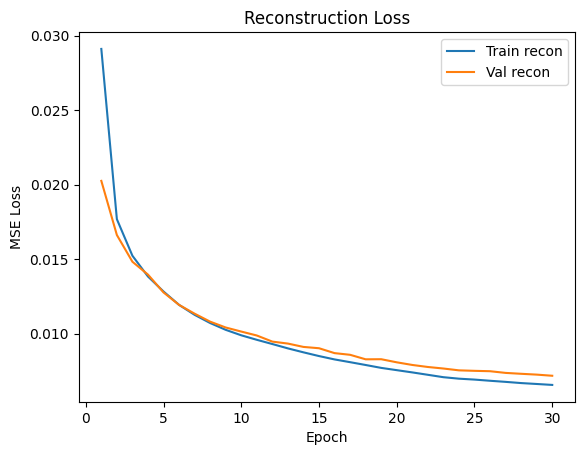

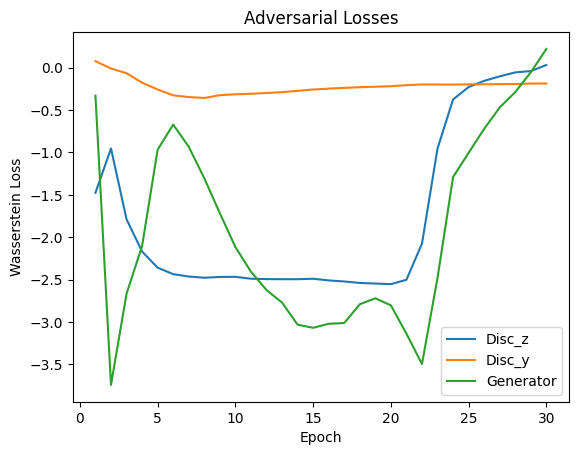

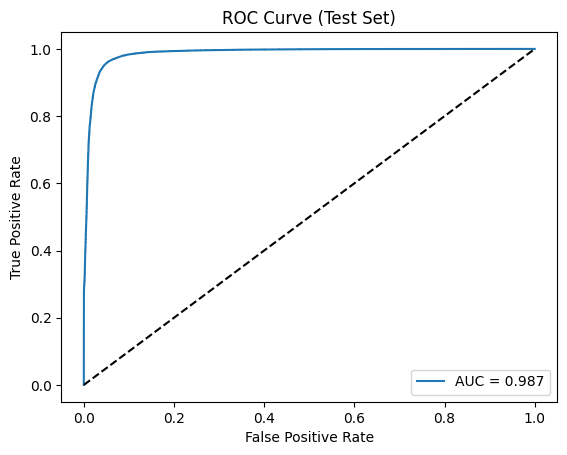

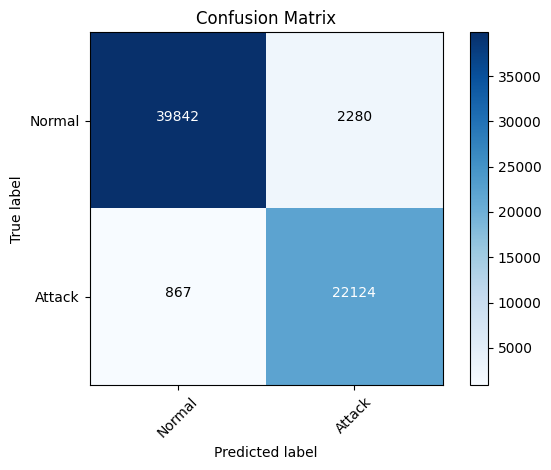

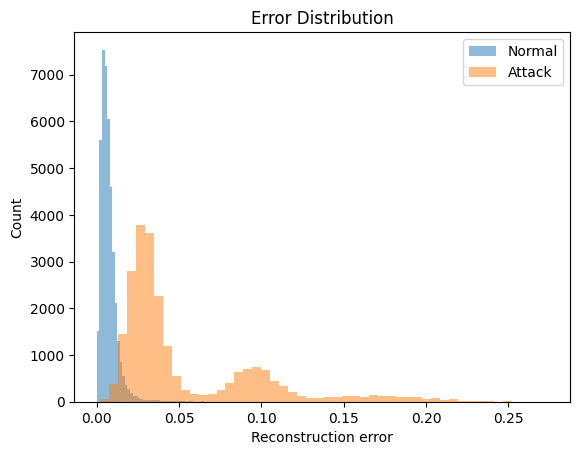

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = ['DoS', 'Fuzzy', 'RPM', 'gear', 'parsed_dataset']
csv_map = {
    'DoS': 'DoS_dataset.csv',
    'Fuzzy': 'Fuzzy_dataset.csv',
    'RPM': 'RPM_dataset.csv',
    'gear': 'gear_dataset.csv',
    'parsed_dataset': 'parsed_dataset.csv'
}

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+ntr+nvl:]} if False else {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# Create/check TFRecords
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

# Lists to track losses
train_re_losses = []
val_re_losses   = []
train_dz_losses = []
train_dy_losses = []
train_g_losses  = []

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    epoch_re, epoch_dz, epoch_dy, epoch_g = 0, 0, 0, 0
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        epoch_re  += lr.numpy()
        epoch_dz += ldz.numpy()
        epoch_dy += ldy.numpy()
        epoch_g  += lg.numpy()
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

    # average losses
    train_re_losses.append(epoch_re/steps_per_epoch)
    train_dz_losses.append(epoch_dz/steps_per_epoch)
    train_dy_losses.append(epoch_dy/steps_per_epoch)
    train_g_losses.append(epoch_g/steps_per_epoch)

    # validation recon loss
    val_loss, val_steps = 0, 0
    val_files = glob.glob('Normal_*_val.tfrecord')
    for fn in val_files:
        ds_val = tf.data.TFRecordDataset(fn).map(parse_feat).batch(BATCH)
        for x_val, _ in ds_val:
            _, yp, _ = aae.encode(x_val + tf.random.normal(tf.shape(x_val),0,0.01))
            x_rec = aae.decode(*aae.encode(x_val)[0:2])
            val_loss += tf.reduce_mean(mse(x_val, x_rec)).numpy()
            val_steps += 1
    val_re_losses.append(val_loss/val_steps)
    print(f"[VALID] recon={val_re_losses[-1]:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
cm = confusion_matrix(ys, (errs > opt_thr).astype(int))
print(cm)
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))

# ------------------------------------------------------------
# 8) Plotting
# ------------------------------------------------------------
# Reconstruction loss curves
plt.figure()
plt.plot(range(1, EPOCHS+1), train_re_losses, label='Train recon')
plt.plot(range(1, EPOCHS+1), val_re_losses,   label='Val recon')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Reconstruction Loss')
plt.legend()
plt.show()

# Adversarial losses
plt.figure()
plt.plot(range(1, EPOCHS+1), train_dz_losses, label='Disc_z')
plt.plot(range(1, EPOCHS+1), train_dy_losses, label='Disc_y')
plt.plot(range(1, EPOCHS+1), train_g_losses,  label='Generator')
plt.xlabel('Epoch')
plt.ylabel('Wasserstein Loss')
plt.title('Adversarial Losses')
plt.legend()
plt.show()

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend()
plt.show()

# Confusion matrix heatmap
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Normal','Attack']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Error distribution histogram
plt.figure()
plt.hist(errs[ys==0], bins=50, alpha=0.5, label='Normal')
plt.hist(errs[ys==1], bins=50, alpha=0.5, label='Attack')
plt.xlabel('Reconstruction error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.legend()
plt.show()


[DATA] Creating TFRecords‚Ä¶
[DATA] Processing Attack_free_CHEVROLET_Spark_train.cleaned.csv
[DATA] Processing parsed_dataset.csv
[DATA] Processing Attack_free_HYUNDAI_Sonata_train.cleaned.csv
[DATA] Processing Flooding_CHEVROLET_Spark_train.cleaned.csv
[DATA] Processing Flooding_HYUNDAI_Sonata_train.cleaned.csv
[DATA] Processing Flooding_KIA_Soul_train.cleaned.csv
[DATA] Processing Fuzzy_CHEVROLET_Spark_train.cleaned.csv
[DATA] Processing Fuzzy_HYUNDAI_Sonata_train.cleaned.csv
[DATA] Processing Fuzzy_KIA_Soul_train.cleaned.csv
[DATA] Processing Malfunction_CHEVROLET_Spark_train.cleaned.csv
[DATA] Processing Malfunction_HYUNDAI_Sonata_train.cleaned.csv
[DATA] Processing Malfunction_KIA_Soul_train.cleaned.csv
[DATA] Processing gear_dataset.csv
[DATA] Processing DoS_dataset.csv
[DATA] Processing RPM_dataset.csv
[DATA] Processing Fuzzy_dataset.csv
[PIPE] records=215424, steps/epoch=1683
[BUILD] all layer variables created: 42

[TRAIN] Epoch 1/30
  step 0/1683 | re=0.2517 dz=3.9785 dy=4.61

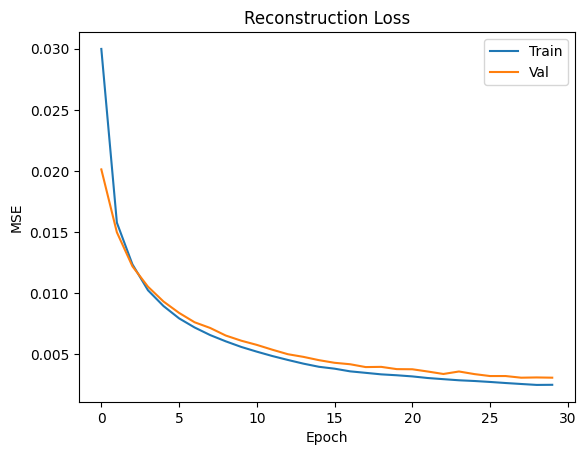

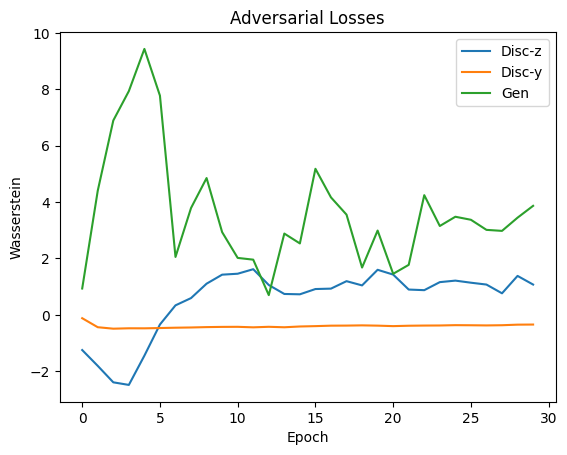

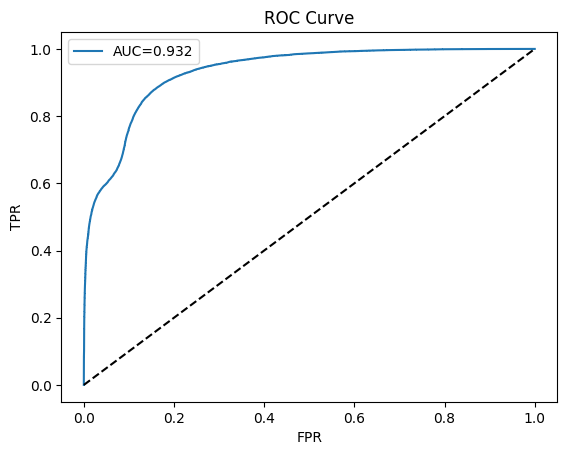

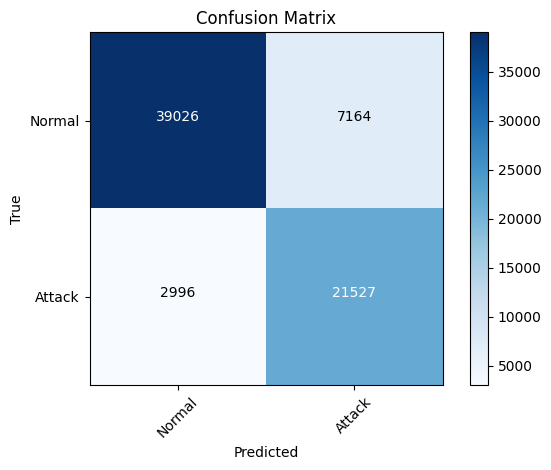

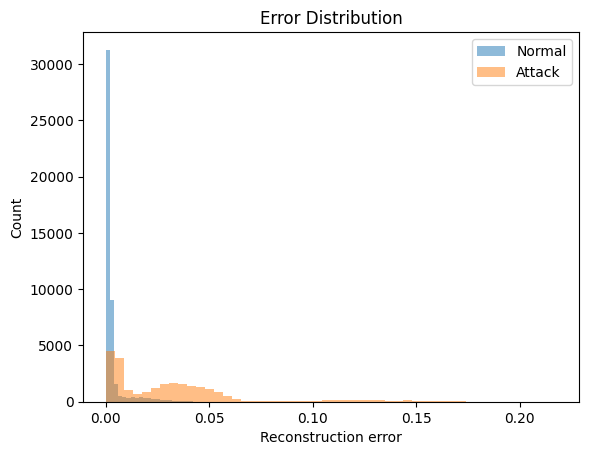

In [ ]:
# ============================================================
# caae_full.py ‚Äì  Conv-AAE end-to-end pipeline (A‚ÜíZ)
# ============================================================

import os, glob, itertools, cv2, numpy as np, pandas as pd, tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# 1) Hyper-parameters
# ------------------------------------------------------------
IMG_SHAPE   = (32, 32, 2)              # <-- ◊™◊û◊ï◊†◊™-◊ß◊ú◊ò
FEATURE_DIM = np.prod(IMG_SHAPE)       # 29*29*2
N_LABELS    = 2

BATCH       = 128
EPOCHS      = 30

LATENT_DIM  = 64
Œª_gp        = 10.0

LR_AE = 5e-4
LR_DZ = 1e-4
LR_DY = 1e-4
LR_G  = 5e-5

ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'           # layer / batch

# ------------------------------------------------------------
# 2) Pre-processing & TFRecord creation  (◊ú◊ú◊ê ◊©◊ô◊†◊ï◊ô ◊ú◊ï◊í◊ô)
# ------------------------------------------------------------
datasets = [
    'Attack_free_CHEVROLET_Spark_train',
    'parsed_dataset',
    'Attack_free_HYUNDAI_Sonata_train',
    'Attack_free_KIA_Soul_train',
    'Flooding_CHEVROLET_Spark_train',
    'Flooding_HYUNDAI_Sonata_train',
    'Flooding_KIA_Soul_train',
    'Fuzzy_CHEVROLET_Spark_train',
    'Fuzzy_HYUNDAI_Sonata_train',
    'Fuzzy_KIA_Soul_train',
    'Malfunction_CHEVROLET_Spark_train',
    'Malfunction_HYUNDAI_Sonata_train',
    'Malfunction_KIA_Soul_train',
    'Attack_free_HY_Sonata_train',
    'Attack_free_KIA_Soul_train',
    'Fuzzy_dataset_HY_Sonata_train',
    'Fuzzy_dataset_KIA_Soul_train',
    'Malfunction_1st_dataset_HY_Sonata_train',
    'Malfunction_1st_dataset_KIA_Soul_train',
    'Malfunction_2nd_HY_Sonata_train',
    'Malfunction_2nd_KIA_Soul_train',
    'Replay_dataset_HY_Sonata_train',
    'Replay_dataset_KIA_Soul_train',
    'gear_dataset',
    'DoS_dataset',
    'RPM_dataset',
    'Fuzzy_dataset',
]
csv_map = {
    'Attack_free_CHEVROLET_Spark_train':   'Attack_free_CHEVROLET_Spark_train.cleaned.csv',
    'Attack_free_HYUNDAI_Sonata_train':    'Attack_free_HYUNDAI_Sonata_train.cleaned.csv',
    'Attack_free_KIA_Soul_train':          'Attack_free_KIA_Soul_train.cleaned.csv',
    'Flooding_CHEVROLET_Spark_train':      'Flooding_CHEVROLET_Spark_train.cleaned.csv',
    'Flooding_HYUNDAI_Sonata_train':       'Flooding_HYUNDAI_Sonata_train.cleaned.csv',
    'Flooding_KIA_Soul_train':             'Flooding_KIA_Soul_train.cleaned.csv',
    'Fuzzy_CHEVROLET_Spark_train':         'Fuzzy_CHEVROLET_Spark_train.cleaned.csv',
    'Fuzzy_HYUNDAI_Sonata_train':          'Fuzzy_HYUNDAI_Sonata_train.cleaned.csv',
    'Fuzzy_KIA_Soul_train':                'Fuzzy_KIA_Soul_train.cleaned.csv',
    'Malfunction_CHEVROLET_Spark_train':   'Malfunction_CHEVROLET_Spark_train.cleaned.csv',
    'Malfunction_HYUNDAI_Sonata_train':    'Malfunction_HYUNDAI_Sonata_train.cleaned.csv',
    'Malfunction_KIA_Soul_train':          'Malfunction_KIA_Soul_train.cleaned.csv',
    'Attack_free_HY_Sonata_train':              'Attack_free_HY_Sonata_train.cleaned_Final.csv',
    'Attack_free_KIA_Soul_train':               'Attack_free_KIA_Soul_train.cleaned_Final.csv',
    'Fuzzy_dataset_HY_Sonata_train':            'Fuzzy_dataset_HY_Sonata_train.cleaned_Final.csv',
    'Fuzzy_dataset_KIA_Soul_train':             'Fuzzy_dataset_KIA_Soul_train.cleaned_Final.csv',
    'Malfunction_1st_dataset_HY_Sonata_train':  'Malfunction_1st_dataset_HY_Sonata_train.cleaned_Final.csv',
    'Malfunction_1st_dataset_KIA_Soul_train':   'Malfunction_1st_dataset_KIA_Soul_train.cleaned_Final.csv',
    'Malfunction_2nd_HY_Sonata_train':          'Malfunction_2nd_HY_Sonata_train.cleaned_Final.csv',
    'Malfunction_2nd_KIA_Soul_train':           'Malfunction_2nd_KIA_Soul_train.cleaned_Final.csv',
    'Replay_dataset_HY_Sonata_train':           'Replay_dataset_HY_Sonata_train.cleaned_Final.csv',
    'Replay_dataset_KIA_Soul_train':            'Replay_dataset_KIA_Soul_train.cleaned_Final.csv',
    'parsed_dataset':                           'parsed_dataset.csv',
    'gear_dataset':                             'gear_dataset.csv',
    'DoS_dataset':                              'DoS_dataset.csv',
    'RPM_dataset':                              'RPM_dataset.csv',
    'Fuzzy_dataset':                            'Fuzzy_dataset.csv',
}



def fill_flag(row):
    if not isinstance(row['Label'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Label'])
    return row

def convert_canid_bits(cid):
    try:
        return np.array(list(map(int, bin(int(str(cid),16))[2:].zfill(29))), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try: return int(str(x).strip(), 16)
    except: return 0

# Replace the preprocess_windows function with this fixed version:
def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    cols = ['Timestamp','canID','DLC']+[f'Data{i}' for i in range(8)] + ['Label']
    df   = pd.read_csv(csv_file, header=None, names=cols, low_memory=False)

    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp','canID']).apply(fill_flag, axis=1)

    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)

    df['Label']    = df['Label'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Label'].values

    win = 29
    N   = len(bits_all)//win
    bits   = bits_all[:N*win].reshape(N, win, 29)
    data   = data_bytes[:N*win].reshape(N, win, 8)
    flags  = flags_all[:N*win].reshape(N, win)

    rows = []
    for i in range(N):
        id_block = bits[i]
        id_img   = cv2.resize(id_block.astype(np.uint8), (32, 32),
                              interpolation=cv2.INTER_NEAREST)

        last_b = data[i,-1,:]
        b8     = np.unpackbits(last_b).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (32, 32),
                              interpolation=cv2.INTER_NEAREST) > .5

        two_ch = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)  # 32x32x2
        rows.append((two_ch.flatten().tolist(), int(flags[i].any())))
    return rows


def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(.7*len(rows)); nvl = int(.15*len(rows))
    splits = {'train':rows[:ntr], 'val':rows[ntr:ntr+nvl], 'test':rows[ntr+nvl:]}
    for phase, chunk in splits.items():
        with tf.io.TFRecordWriter(f"{base}_{phase}.tfrecord") as w:
            for feat,lbl in chunk:
                ex = tf.train.Example(
                     features=tf.train.Features(feature={
                     'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                     'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))}))
                w.write(ex.SerializeToString())

# ◊¶◊ï◊® TFRecords ◊ê◊ù ◊ó◊°◊®◊ô◊ù

print("[DATA] Creating TFRecords‚Ä¶")
for d in datasets:
    if not os.path.exists(csv_map[d]): continue
    rows = preprocess_windows(csv_map[d])
    normals = [r for r in rows if r[1]==0]
    attacks = [r for r in rows if r[1]==1]
    write_tfrecord(normals, f"Normal_{d}")
    if attacks: write_tfrecord(attacks, d)

# ------------------------------------------------------------
# 3) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    fs = {'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
          'label':    tf.io.FixedLenFeature([1], tf.int64)}
    feat = tf.io.parse_single_example(proto, fs)
    x = tf.cast(feat['features'], tf.float32)
    x = tf.reshape(x, IMG_SHAPE)              # <-- ◊™◊û◊ï◊†◊î
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x,y: (x + tf.random.normal(tf.shape(x),0,0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
steps_per_epoch = sum(1 for _ in tf.data.TFRecordDataset(train_files)) // BATCH
print(f"[PIPE] records={steps_per_epoch*BATCH}, steps/epoch={steps_per_epoch}")

# ------------------------------------------------------------
# 4) CAAE Model
# ------------------------------------------------------------
def dense_block(units):
    layers = [tf.keras.layers.Dense(units)]
    if NORM_TYPE=='layer': layers.append(tf.keras.layers.LayerNormalization())
    elif NORM_TYPE=='batch': layers.append(tf.keras.layers.BatchNormalization())
    layers.append(tf.keras.layers.Activation(ACTIVATION))
    if DROPOUT>0: layers.append(tf.keras.layers.Dropout(DROPOUT))
    return tf.keras.Sequential(layers)

class ConvAAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # ---- encoder
        self.enc_c1  = tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_c2  = tf.keras.layers.Conv2D(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_flat= tf.keras.layers.Flatten()
        self.enc_fc  = dense_block(256)
        self.z_layer = tf.keras.layers.Dense(LATENT_DIM)
        self.y_logits= tf.keras.layers.Dense(N_LABELS)

        # ---- decoder
        self.dec_fc   = dense_block(8*8*64)
        self.dec_reshape = tf.keras.layers.Reshape((8,8,64))
        self.dec_t1  = tf.keras.layers.Conv2DTranspose(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_t2  = tf.keras.layers.Conv2DTranspose(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_out = tf.keras.layers.Conv2DTranspose(2,(3,3),padding='same',activation='sigmoid')

        # ---- discriminators (z , y)
        self.dz = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])
        self.dy = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])

    # ---------- forward passes ----------
    def encode(self, x):
        h = self.enc_c2(self.enc_c1(x))
        h = self.enc_fc(self.enc_flat(h))
        z = self.z_layer(h)
        logits = self.y_logits(h)
        y = tf.nn.softmax(logits)
        return z, y, logits

    def decode(self, z, y):
        h = tf.concat([z,y], axis=1)
        h = self.dec_fc(h)
        h = self.dec_reshape(h)
        h = self.dec_t2(self.dec_t1(h))
        return self.dec_out(h)

    def discriminate_z(self, z): return self.dz(z)
    def discriminate_y(self, y): return self.dy(y)

    @staticmethod
    def gp(f, real, fake):
        Œ± = tf.random.uniform([real.shape[0],1],0,1)
        inter = real + Œ±*(fake-real)
        with tf.GradientTape() as t:
            t.watch(inter); p=f(inter)
        g = t.gradient(p, inter)
        slopes = tf.sqrt(tf.reduce_sum(tf.square(g), axis=1)+1e-8)
        return tf.reduce_mean((slopes-1.)**2)

caae = ConvAAE()

# ------------------------------------------------------------
# 4.5) Warm-up: ◊ú◊ë◊†◊ï◊™ ◊ê◊™ ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊ú◊§◊†◊ô ◊î◊ê◊ï◊§◊ò◊ô◊û◊ô◊ñ◊®◊ô◊ù
# ------------------------------------------------------------
dummy_x = tf.zeros((1,) + IMG_SHAPE, dtype=tf.float32)
z0, y0, _ = caae.encode(dummy_x)
_ = caae.decode(z0, y0)
_ = caae.discriminate_z(tf.random.normal((1, LATENT_DIM)))
_ = caae.discriminate_y(tf.one_hot([0], depth=N_LABELS))
print("[BUILD] all layer variables created:", len(caae.trainable_variables))

# ------------------------------------------------------------
# 5) Losses & optimizers  (◊¢◊ù ◊®◊©◊ô◊û◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™)
# ------------------------------------------------------------
ae_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables +
    caae.dec_fc.trainable_variables + caae.dec_reshape.trainable_variables +
    caae.dec_t1.trainable_variables + caae.dec_t2.trainable_variables +
    caae.dec_out.trainable_variables
)
dz_vars = caae.dz.trainable_variables
dy_vars = caae.dy.trainable_variables
enc_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables
)

mse  = tf.keras.losses.MeanSquaredError()
ce   = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

# ------------------------------------------------------------
# 6) Training step (tf.function)
# ------------------------------------------------------------
@tf.function
def train_step(x_noisy, x_clean, y_lbl):
    # ---------- auto-encoder ----------
    with tf.GradientTape() as t_ae:
        z_enc, y_enc, _ = caae.encode(x_noisy)
        x_rec = caae.decode(z_enc, y_enc)
        loss_re = mse(x_clean, x_rec)
    grads = t_ae.gradient(loss_re, ae_vars)
    opt_ae.apply_gradients(zip(grads, ae_vars))

    # ---------- discriminator-z ----------
    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([tf.shape(x_noisy)[0], LATENT_DIM])
        dz_r   = caae.discriminate_z(z_real)
        dz_f   = caae.discriminate_z(z_enc)
        gp_z   = caae.gp(caae.discriminate_z, z_real, z_enc)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp_z
    opt_dz.apply_gradients(zip(t_dz.gradient(loss_dz, dz_vars), dz_vars))

    # ---------- discriminator-y ----------
    with tf.GradientTape() as t_dy:
        dy_r = caae.discriminate_y(y_lbl)
        _, y_enc2, _ = caae.encode(x_clean)
        dy_f = caae.discriminate_y(y_enc2)
        gp_y = caae.gp(caae.discriminate_y, y_lbl, y_enc2)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    opt_dy.apply_gradients(zip(t_dy.gradient(loss_dy, dy_vars), dy_vars))

    # ---------- generator / encoder adversarial ----------
    with tf.GradientTape() as t_g:
        z_g, y_g, logits = caae.encode(x_clean)
        loss_g = (
            -tf.reduce_mean(caae.discriminate_z(z_g))
            -tf.reduce_mean(caae.discriminate_y(y_g))
            + ce(y_lbl, logits)
        )
    opt_g.apply_gradients(zip(t_g.gradient(loss_g, enc_vars), enc_vars))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 7) Training loop
# ------------------------------------------------------------
re_hist, dz_hist, dy_hist, g_hist, val_hist = [],[],[],[],[]

for epoch in range(1, EPOCHS+1):
    print(f"\n[TRAIN] Epoch {epoch}/{EPOCHS}")
    ep_re=ep_dz=ep_dy=ep_g=0
    for step,(xn, xc, y) in enumerate(train_ds.take(steps_per_epoch)):
        lr,ldz,ldy,lg = train_step(xn, xc, y)
        ep_re+=lr.numpy(); ep_dz+=ldz.numpy(); ep_dy+=ldy.numpy(); ep_g+=lg.numpy()
        if step%100==0:
            print(f"  step {step}/{steps_per_epoch} | re={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} g={lg:.4f}")
    re_hist.append(ep_re/steps_per_epoch)
    dz_hist.append(ep_dz/steps_per_epoch)
    dy_hist.append(ep_dy/steps_per_epoch)
    g_hist .append(ep_g /steps_per_epoch)

    # -------- validation recon ----------
    val_loss, n_batches = 0,0
    for fn in glob.glob('Normal_*_val.tfrecord'):
        for x_val,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(BATCH):
            x_rec = caae.decode(*caae.encode(x_val)[0:2])
            val_loss += mse(x_val, x_rec).numpy()
            n_batches += 1
    val_hist.append(val_loss/n_batches)
    print(f"[VAL] recon={val_hist[-1]:.4f}")

# ------------------------------------------------------------
# 8) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

# --- Encoder
enc_in = Input(shape=IMG_SHAPE)
h = caae.enc_c2(caae.enc_c1(enc_in))
h = caae.enc_fc(caae.enc_flat(h))
z_out = caae.z_layer(h)
y_log = caae.y_logits(h)
y_out = Activation('softmax')(y_log)
encoder = Model(enc_in, [z_out,y_out], name='caae_encoder')

# --- Decoder
z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2   = caae.dec_fc(Concatenate()([z_in,y_in]))
h2   = caae.dec_reshape(h2)
h2   = caae.dec_t2(caae.dec_t1(h2))
dec_out = caae.dec_out(h2)
decoder = Model([z_in,y_in], dec_out, name='caae_decoder')

encoder.save('caae_encoder.keras')
decoder.save('caae_decoder.keras')
print("[SAVE] models stored")

# ------------------------------------------------------------
# 9) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    for x_batch,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(256):
        z_p,y_p = encoder(x_batch)
        x_r = decoder([z_p,y_p])
        e = tf.reduce_mean(tf.square(x_batch - x_r), axis=[1,2,3]).numpy()
        errs.append(e); ys.append(np.full(e.shape,label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr,tpr,ths = roc_curve(ys, errs)
roc_auc     = auc(fpr,tpr)
best_idx    = np.argmax(tpr-fpr)
thr_opt     = ths[best_idx]

print(f"\n[RESULT] ROC-AUC={roc_auc:.4f} | Thr={thr_opt:.6f} | "
      f"TPR={tpr[best_idx]:.3f} | FPR={fpr[best_idx]:.3f}")
cm = confusion_matrix(ys, (errs>thr_opt).astype(int))
print("[CM]\n", cm)
print("[Report]\n", classification_report(ys,(errs>thr_opt).astype(int),
                                          target_names=['Normal','Attack']))

# ------------------------------------------------------------
# 10) Plotting
# ------------------------------------------------------------
# -- Reconstruction loss curves
plt.figure(); plt.plot(re_hist,label='Train'); plt.plot(val_hist,label='Val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Reconstruction Loss'); plt.legend(); plt.show()

# -- Adversarial losses
plt.figure(); plt.plot(dz_hist,label='Disc-z'); plt.plot(dy_hist,label='Disc-y'); plt.plot(g_hist,label='Gen')
plt.xlabel('Epoch'); plt.ylabel('Wasserstein'); plt.title('Adversarial Losses'); plt.legend(); plt.show()

# -- ROC curve
plt.figure(); plt.plot(fpr,tpr,label=f'AUC={roc_auc:.3f}'); plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend(); plt.show()

# -- Confusion-matrix heat-map
plt.figure(); plt.imshow(cm,cmap=plt.cm.Blues); plt.title('Confusion Matrix'); plt.colorbar()
ticks = np.arange(2); classes=['Normal','Attack']
plt.xticks(ticks,classes,rotation=45); plt.yticks(ticks,classes)
th = cm.max()/2
for i,j in itertools.product(range(2),range(2)):
    plt.text(j,i,cm[i,j],ha='center',color='white' if cm[i,j]>th else 'black')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.tight_layout(); plt.show()

# -- Error distributions
plt.figure()
plt.hist(errs[ys==0],bins=50,alpha=.5,label='Normal')
plt.hist(errs[ys==1],bins=50,alpha=.5,label='Attack')
plt.xlabel('Reconstruction error'); plt.ylabel('Count')
plt.title('Error Distribution'); plt.legend(); plt.show()


In [ ]:
import pandas as pd
from pathlib import Path
import logging

from pathlib import Path
import logging
import pandas as pd

def clean_and_save_csv(csv_file: str) -> str:
    """
    ◊û◊†◊ß◊î ◊ß◊ï◊ë◊• CSV: ◊û◊°◊ô◊® ◊¢◊û◊ï◊ì◊™ ◊ê◊ô◊†◊ì◊ß◊°, ◊û◊§◊¶◊ú ◊ï◊û◊®◊§◊ì ◊ê◊™ ◊¢◊û◊ï◊ì◊™ ◊î-Data, ◊ï◊©◊ï◊û◊® ◊û◊ó◊ì◊©.
    Label ◊™◊û◊ô◊ì ◊™◊ï◊§◊ô◊¢ ◊ê◊ó◊®◊ô DATA[7].

    Args:
        csv_file (str): ◊î◊†◊™◊ô◊ë ◊ú◊ß◊ï◊ë◊• ◊î◊û◊ß◊ï◊®◊ô.

    Returns:
        str: ◊î◊†◊™◊ô◊ë ◊ú◊ß◊ï◊ë◊• ◊î◊ó◊ì◊© ◊©◊†◊©◊û◊®.
    """
    # ◊ß◊®◊ô◊ê◊î ◊¢◊ù ◊¢◊û◊ï◊ì◊î ◊ê◊ó◊™ ◊ú÷æData

    cols = ['Timestamp', 'CAN ID', 'DLC', 'Data', 'Label']
    df = pd.read_csv(csv_file, header=None, names=cols, low_memory=False)

    # ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊™ index

    # ◊î◊û◊®◊ï◊™ ◊ë◊°◊ô◊°◊ô◊ï◊™
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC'] = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'CAN ID'])

    # ◊†◊ô◊ß◊ï◊ô ◊¢◊®◊õ◊ô Data
    def process_data_field(raw):
        if pd.isna(raw): return ['00'] * 8
        raw = str(raw).replace(" ", "")  # ◊î◊°◊®◊™ ◊®◊ï◊ï◊ó◊ô◊ù
        bytes_list = [raw[i:i+2] for i in range(0, len(raw), 2)]
        while len(bytes_list) < 8:
            bytes_list.append("00")
        return bytes_list[:8]

    # ◊î◊ó◊ú◊™ ◊î◊§◊ô◊¶◊ï◊ú ◊ï◊î◊§◊ô◊®◊ï◊ß
    processed_data = df['Data'].apply(process_data_field)
    data_df = pd.DataFrame(processed_data.tolist(), columns=[f'DATA[{i}]' for i in range(8)])
    df.drop(columns=['Data'], inplace=True)

    # ◊¢◊ì◊õ◊ï◊ü DLC ◊ú-8 ◊ê◊ù ◊î◊ô◊î ◊§◊ó◊ï◊™
    df['DLC'] = 8

    # ◊ë◊†◊ô◊ô◊™ ◊î◊°◊ì◊® ◊î◊†◊õ◊ï◊ü ◊û◊ó◊ì◊©
    final_df = pd.concat([df[['Timestamp', 'CAN ID', 'DLC']].reset_index(drop=True),
                          data_df.reset_index(drop=True),
                          df[['Label']].reset_index(drop=True)], axis=1)

    # ◊©◊û◊ô◊®◊î
    out_file = Path(csv_file).with_suffix('.cleaned.csv')
    final_df.to_csv(out_file, index=False)
    logging.info(f"[CLEAN] Saved cleaned file: {out_file}")
    return str(out_file)

# ◊®◊©◊ô◊û◊™ ◊©◊û◊ï◊™ ◊î◊ß◊ë◊¶◊ô◊ù ◊û◊™◊ï◊ö ◊î◊™◊û◊ï◊†◊î
csv_files = [
    "Attack_free_CHEVROLET_Spark_train.csv",
    "Attack_free_HYUNDAI_Sonata_train.csv",
    "Attack_free_KIA_Soul_train.csv",
    "Flooding_CHEVROLET_Spark_train.csv",
    "Flooding_HYUNDAI_Sonata_train.csv",
    "Flooding_KIA_Soul_train.csv",
    "Fuzzy_CHEVROLET_Spark_train.csv",
    'Attack_free_HY_Sonata_train.csv',
    'Attack_free_KIA_Soul_train.csv',
    'Fuzzy_dataset_HY_Sonata_train.csv',
    'Fuzzy_dataset_KIA_Soul_train.csv',
    'Malfunction_1st_dataset_HY_Sonata_train.csv',
    'Malfunction_1st_dataset_KIA_Soul_train.csv',
    'Malfunction_2nd_HY_Sonata_train.csv',
    'Malfunction_2nd_KIA_Soul_train.csv',
    'Replay_dataset_HY_Sonata_train.csv',
    'Replay_dataset_KIA_Soul_train.csv'
]


# ◊†◊™◊ô◊ë ◊ú◊™◊ô◊ß◊ô◊ô◊î ◊î◊û◊õ◊ô◊ú◊î ◊ê◊™ ◊î◊ß◊ë◊¶◊ô◊ù

# ◊î◊§◊¢◊ú◊™ ◊î◊§◊ï◊†◊ß◊¶◊ô◊î ◊¢◊ú ◊õ◊ú ◊ß◊ï◊ë◊•
for fname in csv_files:
    try:
        cleaned_path = clean_and_save_csv(str(fname))
        print(f"[‚úì] Cleaned: {cleaned_path}")
    except Exception as e:
        print(f"[‚úó] Failed: {fname} ‚Äî {e}")


[‚úì] Cleaned: Attack_free_CHEVROLET_Spark_train.cleaned.csv
[‚úó] Failed: Attack_free_HYUNDAI_Sonata_train.csv ‚Äî [Errno 2] No such file or directory: 'Attack_free_HYUNDAI_Sonata_train.csv'
[‚úì] Cleaned: Attack_free_KIA_Soul_train.cleaned.csv
[‚úì] Cleaned: Flooding_CHEVROLET_Spark_train.cleaned.csv
[‚úì] Cleaned: Flooding_HYUNDAI_Sonata_train.cleaned.csv
[‚úì] Cleaned: Flooding_KIA_Soul_train.cleaned.csv
[‚úì] Cleaned: Fuzzy_CHEVROLET_Spark_train.cleaned.csv
[‚úì] Cleaned: Attack_free_HY_Sonata_train.cleaned.csv
[‚úì] Cleaned: Attack_free_KIA_Soul_train.cleaned.csv
[‚úì] Cleaned: Fuzzy_dataset_HY_Sonata_train.cleaned.csv
[‚úì] Cleaned: Fuzzy_dataset_KIA_Soul_train.cleaned.csv
[‚úì] Cleaned: Malfunction_1st_dataset_HY_Sonata_train.cleaned.csv
[‚úì] Cleaned: Malfunction_1st_dataset_KIA_Soul_train.cleaned.csv
[‚úì] Cleaned: Malfunction_2nd_HY_Sonata_train.cleaned.csv
[‚úì] Cleaned: Malfunction_2nd_KIA_Soul_train.cleaned.csv
[‚úì] Cleaned: Replay_dataset_HY_Sonata_train.cleaned.csv
[‚ú

[DATA] Creating TFRecords‚Ä¶
[DATA] Processing Attack_free_CHEVROLET_Spark_train.cleaned.csv
[DATA] Processing Attack_free_KIA_Soul_train.cleaned.csv
[DATA] Processing Flooding_CHEVROLET_Spark_train.cleaned.csv
[DATA] Processing Flooding_HYUNDAI_Sonata_train.cleaned.csv
[DATA] Processing Flooding_KIA_Soul_train.cleaned.csv
[DATA] Processing Fuzzy_CHEVROLET_Spark_train.cleaned.csv
[DATA] Processing Attack_free_HY_Sonata_train.cleaned.csv
[DATA] Processing Attack_free_KIA_Soul_train.cleaned.csv
[DATA] Processing Fuzzy_dataset_HY_Sonata_train.cleaned.csv
[DATA] Processing Fuzzy_dataset_KIA_Soul_train.cleaned.csv
[DATA] Processing Malfunction_1st_dataset_HY_Sonata_train.cleaned.csv
[DATA] Processing Malfunction_1st_dataset_KIA_Soul_train.cleaned.csv
[DATA] Processing Malfunction_2nd_HY_Sonata_train.cleaned.csv
[DATA] Processing Malfunction_2nd_KIA_Soul_train.cleaned.csv
[DATA] Processing Replay_dataset_HY_Sonata_train.cleaned.csv
[DATA] Processing Replay_dataset_KIA_Soul_train.cleaned.csv


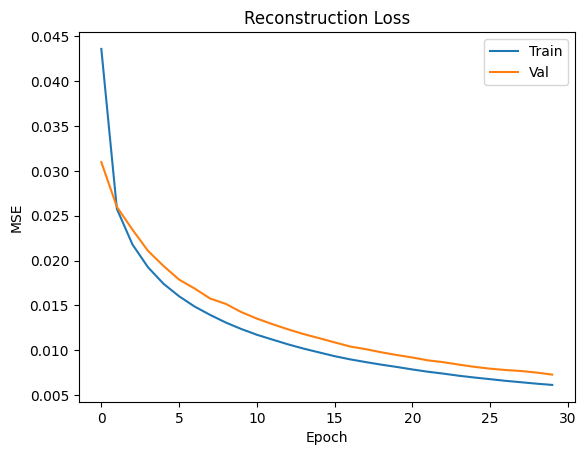

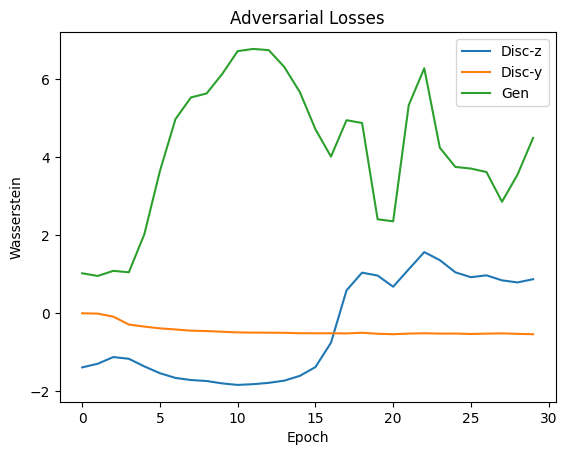

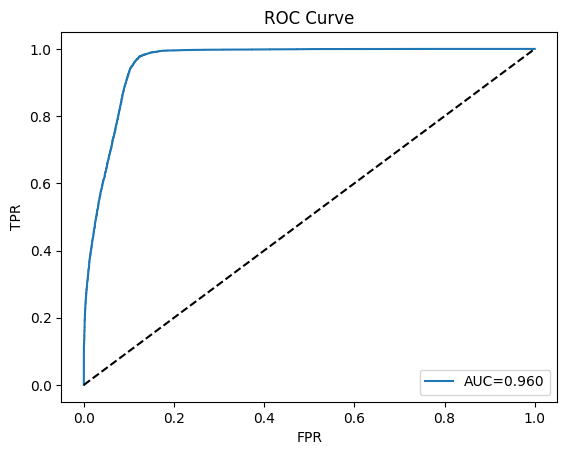

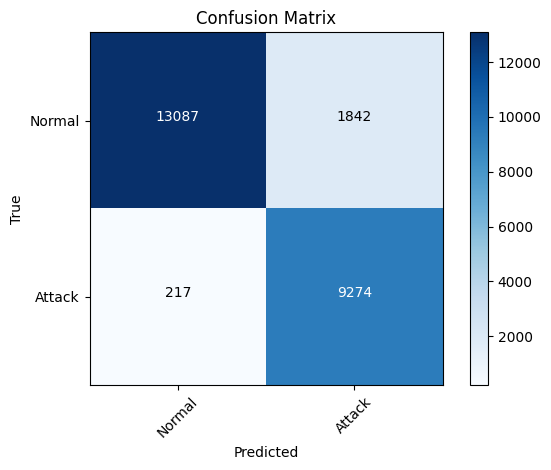

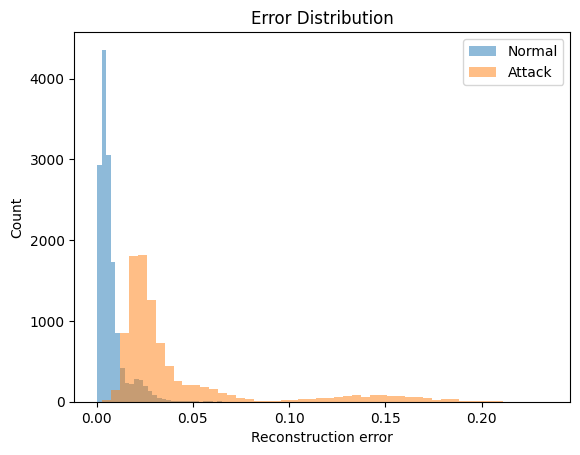

In [ ]:
# ============================================================
# caae_full.py ‚Äì  Conv-AAE end-to-end pipeline (A‚ÜíZ)
# ============================================================

import os, glob, itertools, cv2, numpy as np, pandas as pd, tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# 1) Hyper-parameters
# ------------------------------------------------------------
IMG_SHAPE   = (32, 32, 2)              # <-- ◊™◊û◊ï◊†◊™-◊ß◊ú◊ò
FEATURE_DIM = np.prod(IMG_SHAPE)       # 29*29*2
N_LABELS    = 2

BATCH       = 128
EPOCHS      = 30

LATENT_DIM  = 64
Œª_gp        = 10.0

LR_AE = 5e-4
LR_DZ = 1e-4
LR_DY = 1e-4
LR_G  = 5e-5

ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'           # layer / batch

# ------------------------------------------------------------
# 2) Pre-processing & TFRecord creation  (◊ú◊ú◊ê ◊©◊ô◊†◊ï◊ô ◊ú◊ï◊í◊ô)
# ------------------------------------------------------------
datasets = [
    'Attack_free_CHEVROLET_Spark_train',
    'Attack_free_KIA_Soul_train',
    'Flooding_CHEVROLET_Spark_train',
    'Flooding_HYUNDAI_Sonata_train',
    'Flooding_KIA_Soul_train',
    'Fuzzy_CHEVROLET_Spark_train',
    'Attack_free_HY_Sonata_train',
    'Attack_free_KIA_Soul_train',
    'Fuzzy_dataset_HY_Sonata_train',
    'Fuzzy_dataset_KIA_Soul_train',
    'Malfunction_1st_dataset_HY_Sonata_train',
    'Malfunction_1st_dataset_KIA_Soul_train',
    'Malfunction_2nd_HY_Sonata_train',
    'Malfunction_2nd_KIA_Soul_train',
    'Replay_dataset_HY_Sonata_train',
    'Replay_dataset_KIA_Soul_train'
]
csv_map = {
    'Attack_free_CHEVROLET_Spark_train':   'Attack_free_CHEVROLET_Spark_train.cleaned.csv',
    'Attack_free_KIA_Soul_train':          'Attack_free_KIA_Soul_train.cleaned.csv',
    'Flooding_CHEVROLET_Spark_train':      'Flooding_CHEVROLET_Spark_train.cleaned.csv',
    'Flooding_HYUNDAI_Sonata_train':       'Flooding_HYUNDAI_Sonata_train.cleaned.csv',
    'Flooding_KIA_Soul_train':             'Flooding_KIA_Soul_train.cleaned.csv',
    'Fuzzy_CHEVROLET_Spark_train':         'Fuzzy_CHEVROLET_Spark_train.cleaned.csv',
    'Attack_free_HY_Sonata_train':         'Attack_free_HY_Sonata_train.cleaned.csv',
    'Attack_free_KIA_Soul_train':          'Attack_free_KIA_Soul_train.cleaned.csv',
    'Fuzzy_dataset_HY_Sonata_train':       'Fuzzy_dataset_HY_Sonata_train.cleaned.csv',
    'Fuzzy_dataset_KIA_Soul_train':        'Fuzzy_dataset_KIA_Soul_train.cleaned.csv',
    'Malfunction_1st_dataset_HY_Sonata_train':  'Malfunction_1st_dataset_HY_Sonata_train.cleaned.csv',
    'Malfunction_1st_dataset_KIA_Soul_train':   'Malfunction_1st_dataset_KIA_Soul_train.cleaned.csv',
    'Malfunction_2nd_HY_Sonata_train':          'Malfunction_2nd_HY_Sonata_train.cleaned.csv',
    'Malfunction_2nd_KIA_Soul_train':           'Malfunction_2nd_KIA_Soul_train.cleaned.csv',
    'Replay_dataset_HY_Sonata_train':           'Replay_dataset_HY_Sonata_train.cleaned.csv',
    'Replay_dataset_KIA_Soul_train':            'Replay_dataset_KIA_Soul_train.cleaned.csv'
}


def fill_flag(row):
    if not isinstance(row['Label'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Label'])
    return row

def convert_canid_bits(cid):
    try:
        return np.array(list(map(int, bin(int(str(cid),16))[2:].zfill(29))), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try: return int(str(x).strip(), 16)
    except: return 0

# Replace the preprocess_windows function with this fixed version:
def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    cols = ['Timestamp','canID','DLC']+[f'Data{i}' for i in range(8)] + ['Label']
    df   = pd.read_csv(csv_file, header=None, names=cols, low_memory=False)

    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp','canID']).apply(fill_flag, axis=1)

    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)

    df['Label']    = df['Label'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Label'].values

    win = 29
    N   = len(bits_all)//win
    bits   = bits_all[:N*win].reshape(N, win, 29)
    data   = data_bytes[:N*win].reshape(N, win, 8)
    flags  = flags_all[:N*win].reshape(N, win)

    rows = []
    for i in range(N):
        id_block = bits[i]
        id_img   = cv2.resize(id_block.astype(np.uint8), (32, 32),
                              interpolation=cv2.INTER_NEAREST)

        last_b = data[i,-1,:]
        b8     = np.unpackbits(last_b).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (32, 32),
                              interpolation=cv2.INTER_NEAREST) > .5

        two_ch = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)  # 32x32x2
        rows.append((two_ch.flatten().tolist(), int(flags[i].any())))
    return rows


def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(.7*len(rows)); nvl = int(.15*len(rows))
    splits = {'train':rows[:ntr], 'val':rows[ntr:ntr+nvl], 'test':rows[ntr+nvl:]}
    for phase, chunk in splits.items():
        with tf.io.TFRecordWriter(f"{base}_{phase}.tfrecord") as w:
            for feat,lbl in chunk:
                ex = tf.train.Example(
                     features=tf.train.Features(feature={
                     'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                     'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))}))
                w.write(ex.SerializeToString())

# ◊¶◊ï◊® TFRecords ◊ê◊ù ◊ó◊°◊®◊ô◊ù

print("[DATA] Creating TFRecords‚Ä¶")
for d in datasets:
    if not os.path.exists(csv_map[d]): continue
    rows = preprocess_windows(csv_map[d])
    normals = [r for r in rows if r[1]==0]
    attacks = [r for r in rows if r[1]==1]
    write_tfrecord(normals, f"Normal_{d}")
    if attacks: write_tfrecord(attacks, d)

# ------------------------------------------------------------
# 3) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    fs = {'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
          'label':    tf.io.FixedLenFeature([1], tf.int64)}
    feat = tf.io.parse_single_example(proto, fs)
    x = tf.cast(feat['features'], tf.float32)
    x = tf.reshape(x, IMG_SHAPE)              # <-- ◊™◊û◊ï◊†◊î
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x,y: (x + tf.random.normal(tf.shape(x),0,0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
steps_per_epoch = sum(1 for _ in tf.data.TFRecordDataset(train_files)) // BATCH
print(f"[PIPE] records={steps_per_epoch*BATCH}, steps/epoch={steps_per_epoch}")

# ------------------------------------------------------------
# 4) CAAE Model
# ------------------------------------------------------------
def dense_block(units):
    layers = [tf.keras.layers.Dense(units)]
    if NORM_TYPE=='layer': layers.append(tf.keras.layers.LayerNormalization())
    elif NORM_TYPE=='batch': layers.append(tf.keras.layers.BatchNormalization())
    layers.append(tf.keras.layers.Activation(ACTIVATION))
    if DROPOUT>0: layers.append(tf.keras.layers.Dropout(DROPOUT))
    return tf.keras.Sequential(layers)

class ConvAAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # ---- encoder
        self.enc_c1  = tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_c2  = tf.keras.layers.Conv2D(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_flat= tf.keras.layers.Flatten()
        self.enc_fc  = dense_block(256)
        self.z_layer = tf.keras.layers.Dense(LATENT_DIM)
        self.y_logits= tf.keras.layers.Dense(N_LABELS)

        # ---- decoder
        self.dec_fc   = dense_block(8*8*64)
        self.dec_reshape = tf.keras.layers.Reshape((8,8,64))
        self.dec_t1  = tf.keras.layers.Conv2DTranspose(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_t2  = tf.keras.layers.Conv2DTranspose(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_out = tf.keras.layers.Conv2DTranspose(2,(3,3),padding='same',activation='sigmoid')

        # ---- discriminators (z , y)
        self.dz = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])
        self.dy = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])

    # ---------- forward passes ----------
    def encode(self, x):
        h = self.enc_c2(self.enc_c1(x))
        h = self.enc_fc(self.enc_flat(h))
        z = self.z_layer(h)
        logits = self.y_logits(h)
        y = tf.nn.softmax(logits)
        return z, y, logits

    def decode(self, z, y):
        h = tf.concat([z,y], axis=1)
        h = self.dec_fc(h)
        h = self.dec_reshape(h)
        h = self.dec_t2(self.dec_t1(h))
        return self.dec_out(h)

    def discriminate_z(self, z): return self.dz(z)
    def discriminate_y(self, y): return self.dy(y)

    @staticmethod
    def gp(f, real, fake):
        Œ± = tf.random.uniform([real.shape[0],1],0,1)
        inter = real + Œ±*(fake-real)
        with tf.GradientTape() as t:
            t.watch(inter); p=f(inter)
        g = t.gradient(p, inter)
        slopes = tf.sqrt(tf.reduce_sum(tf.square(g), axis=1)+1e-8)
        return tf.reduce_mean((slopes-1.)**2)

caae = ConvAAE()

# ------------------------------------------------------------
# 4.5) Warm-up: ◊ú◊ë◊†◊ï◊™ ◊ê◊™ ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊ú◊§◊†◊ô ◊î◊ê◊ï◊§◊ò◊ô◊û◊ô◊ñ◊®◊ô◊ù
# ------------------------------------------------------------
dummy_x = tf.zeros((1,) + IMG_SHAPE, dtype=tf.float32)
z0, y0, _ = caae.encode(dummy_x)
_ = caae.decode(z0, y0)
_ = caae.discriminate_z(tf.random.normal((1, LATENT_DIM)))
_ = caae.discriminate_y(tf.one_hot([0], depth=N_LABELS))
print("[BUILD] all layer variables created:", len(caae.trainable_variables))

# ------------------------------------------------------------
# 5) Losses & optimizers  (◊¢◊ù ◊®◊©◊ô◊û◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™)
# ------------------------------------------------------------
ae_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables +
    caae.dec_fc.trainable_variables + caae.dec_reshape.trainable_variables +
    caae.dec_t1.trainable_variables + caae.dec_t2.trainable_variables +
    caae.dec_out.trainable_variables
)
dz_vars = caae.dz.trainable_variables
dy_vars = caae.dy.trainable_variables
enc_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables
)

mse  = tf.keras.losses.MeanSquaredError()
ce   = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

# ------------------------------------------------------------
# 6) Training step (tf.function)
# ------------------------------------------------------------
@tf.function
def train_step(x_noisy, x_clean, y_lbl):
    # ---------- auto-encoder ----------
    with tf.GradientTape() as t_ae:
        z_enc, y_enc, _ = caae.encode(x_noisy)
        x_rec = caae.decode(z_enc, y_enc)
        loss_re = mse(x_clean, x_rec)
    grads = t_ae.gradient(loss_re, ae_vars)
    opt_ae.apply_gradients(zip(grads, ae_vars))

    # ---------- discriminator-z ----------
    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([tf.shape(x_noisy)[0], LATENT_DIM])
        dz_r   = caae.discriminate_z(z_real)
        dz_f   = caae.discriminate_z(z_enc)
        gp_z   = caae.gp(caae.discriminate_z, z_real, z_enc)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp_z
    opt_dz.apply_gradients(zip(t_dz.gradient(loss_dz, dz_vars), dz_vars))

    # ---------- discriminator-y ----------
    with tf.GradientTape() as t_dy:
        dy_r = caae.discriminate_y(y_lbl)
        _, y_enc2, _ = caae.encode(x_clean)
        dy_f = caae.discriminate_y(y_enc2)
        gp_y = caae.gp(caae.discriminate_y, y_lbl, y_enc2)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    opt_dy.apply_gradients(zip(t_dy.gradient(loss_dy, dy_vars), dy_vars))

    # ---------- generator / encoder adversarial ----------
    with tf.GradientTape() as t_g:
        z_g, y_g, logits = caae.encode(x_clean)
        loss_g = (
            -tf.reduce_mean(caae.discriminate_z(z_g))
            -tf.reduce_mean(caae.discriminate_y(y_g))
            + ce(y_lbl, logits)
        )
    opt_g.apply_gradients(zip(t_g.gradient(loss_g, enc_vars), enc_vars))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 7) Training loop
# ------------------------------------------------------------
re_hist, dz_hist, dy_hist, g_hist, val_hist = [],[],[],[],[]

for epoch in range(1, EPOCHS+1):
    print(f"\n[TRAIN] Epoch {epoch}/{EPOCHS}")
    ep_re=ep_dz=ep_dy=ep_g=0
    for step,(xn, xc, y) in enumerate(train_ds.take(steps_per_epoch)):
        lr,ldz,ldy,lg = train_step(xn, xc, y)
        ep_re+=lr.numpy(); ep_dz+=ldz.numpy(); ep_dy+=ldy.numpy(); ep_g+=lg.numpy()
        if step%100==0:
            print(f"  step {step}/{steps_per_epoch} | re={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} g={lg:.4f}")
    re_hist.append(ep_re/steps_per_epoch)
    dz_hist.append(ep_dz/steps_per_epoch)
    dy_hist.append(ep_dy/steps_per_epoch)
    g_hist .append(ep_g /steps_per_epoch)

    # -------- validation recon ----------
    val_loss, n_batches = 0,0
    for fn in glob.glob('Normal_*_val.tfrecord'):
        for x_val,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(BATCH):
            x_rec = caae.decode(*caae.encode(x_val)[0:2])
            val_loss += mse(x_val, x_rec).numpy()
            n_batches += 1
    val_hist.append(val_loss/n_batches)
    print(f"[VAL] recon={val_hist[-1]:.4f}")

# ------------------------------------------------------------
# 8) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

# --- Encoder
enc_in = Input(shape=IMG_SHAPE)
h = caae.enc_c2(caae.enc_c1(enc_in))
h = caae.enc_fc(caae.enc_flat(h))
z_out = caae.z_layer(h)
y_log = caae.y_logits(h)
y_out = Activation('softmax')(y_log)
encoder = Model(enc_in, [z_out,y_out], name='caae_encoder')

# --- Decoder
z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2   = caae.dec_fc(Concatenate()([z_in,y_in]))
h2   = caae.dec_reshape(h2)
h2   = caae.dec_t2(caae.dec_t1(h2))
dec_out = caae.dec_out(h2)
decoder = Model([z_in,y_in], dec_out, name='caae_decoder')

encoder.save('caae_encoder.keras')
decoder.save('caae_decoder.keras')
print("[SAVE] models stored")

# ------------------------------------------------------------
# 9) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    for x_batch,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(256):
        z_p,y_p = encoder(x_batch)
        x_r = decoder([z_p,y_p])
        e = tf.reduce_mean(tf.square(x_batch - x_r), axis=[1,2,3]).numpy()
        errs.append(e); ys.append(np.full(e.shape,label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr,tpr,ths = roc_curve(ys, errs)
roc_auc     = auc(fpr,tpr)
best_idx    = np.argmax(tpr-fpr)
thr_opt     = ths[best_idx]

print(f"\n[RESULT] ROC-AUC={roc_auc:.4f} | Thr={thr_opt:.6f} | "
      f"TPR={tpr[best_idx]:.3f} | FPR={fpr[best_idx]:.3f}")
cm = confusion_matrix(ys, (errs>thr_opt).astype(int))
print("[CM]\n", cm)
print("[Report]\n", classification_report(ys,(errs>thr_opt).astype(int),
                                          target_names=['Normal','Attack']))

# ------------------------------------------------------------
# 10) Plotting
# ------------------------------------------------------------
# -- Reconstruction loss curves
plt.figure(); plt.plot(re_hist,label='Train'); plt.plot(val_hist,label='Val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Reconstruction Loss'); plt.legend(); plt.show()

# -- Adversarial losses
plt.figure(); plt.plot(dz_hist,label='Disc-z'); plt.plot(dy_hist,label='Disc-y'); plt.plot(g_hist,label='Gen')
plt.xlabel('Epoch'); plt.ylabel('Wasserstein'); plt.title('Adversarial Losses'); plt.legend(); plt.show()

# -- ROC curve
plt.figure(); plt.plot(fpr,tpr,label=f'AUC={roc_auc:.3f}'); plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend(); plt.show()

# -- Confusion-matrix heat-map
plt.figure(); plt.imshow(cm,cmap=plt.cm.Blues); plt.title('Confusion Matrix'); plt.colorbar()
ticks = np.arange(2); classes=['Normal','Attack']
plt.xticks(ticks,classes,rotation=45); plt.yticks(ticks,classes)
th = cm.max()/2
for i,j in itertools.product(range(2),range(2)):
    plt.text(j,i,cm[i,j],ha='center',color='white' if cm[i,j]>th else 'black')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.tight_layout(); plt.show()

# -- Error distributions
plt.figure()
plt.hist(errs[ys==0],bins=50,alpha=.5,label='Normal')
plt.hist(errs[ys==1],bins=50,alpha=.5,label='Attack')
plt.xlabel('Reconstruction error'); plt.ylabel('Count')
plt.title('Error Distribution'); plt.legend(); plt.show()


[DATA] Creating TFRecords‚Ä¶
[DATA] Processing File_1_cleaned_Final.csv
[DATA] Processing File_2_cleaned_Final.csv
[DATA] Processing File_3_cleaned_Final.csv
[DATA] Processing File_4_cleaned_Final.csv
[DATA] Processing File_7_cleaned_Final.csv
[DATA] Processing File_8_cleaned_Final.csv
[DATA] Processing File_9_cleaned_Final.csv
[PIPE] records=4224, steps/epoch=33
[BUILD] all layer variables created: 42

[TRAIN] Epoch 1/50
  step 0/33 | re=0.2540 dz=3.3285 dy=2.5063 g=-0.9755
[VAL] recon=0.0985

[TRAIN] Epoch 2/50
  step 0/33 | re=0.1001 dz=-1.4942 dy=0.1744 g=1.6572
[VAL] recon=0.0592

[TRAIN] Epoch 3/50
  step 0/33 | re=0.0584 dz=-1.6429 dy=0.0434 g=1.4947
[VAL] recon=0.0440

[TRAIN] Epoch 4/50
  step 0/33 | re=0.0442 dz=-1.8819 dy=0.0242 g=1.3863
[VAL] recon=0.0398

[TRAIN] Epoch 5/50
  step 0/33 | re=0.0393 dz=-1.9095 dy=0.0026 g=1.3399
[VAL] recon=0.0378

[TRAIN] Epoch 6/50
  step 0/33 | re=0.0374 dz=-1.8725 dy=0.0014 g=1.1223
[VAL] recon=0.0363

[TRAIN] Epoch 7/50
  step 0/33 | re

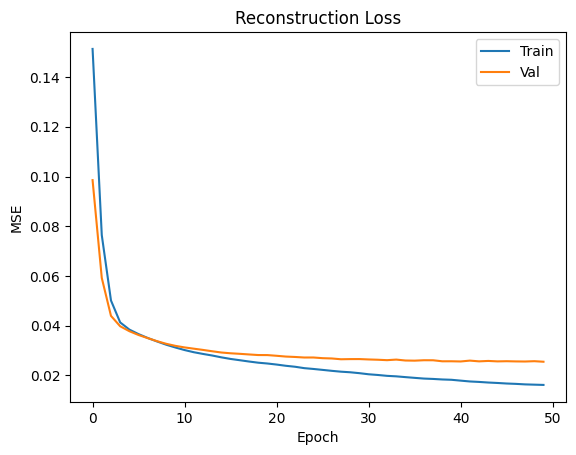

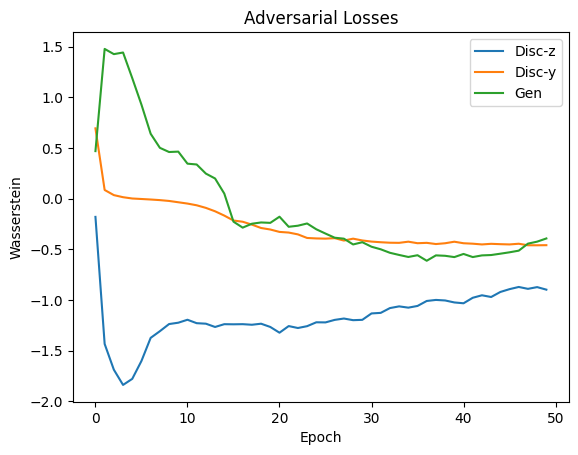

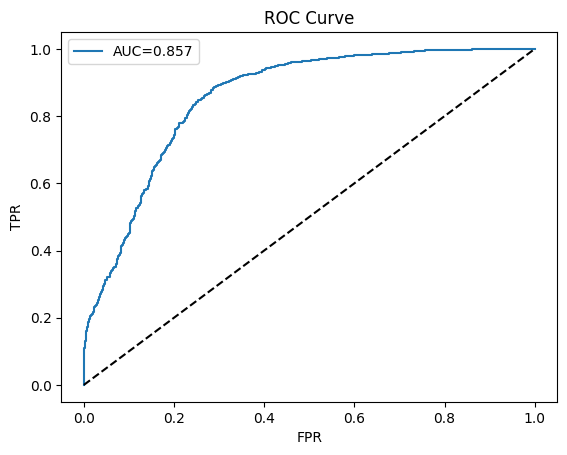

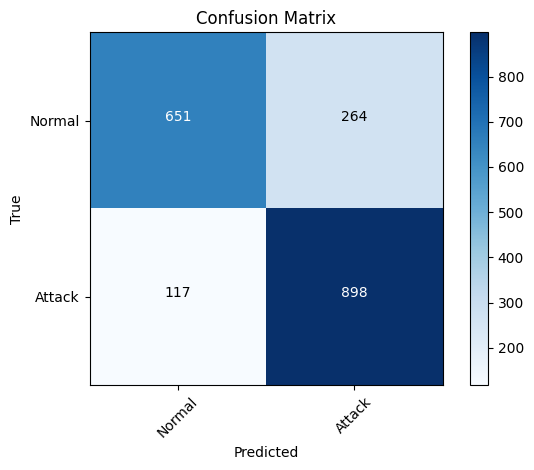

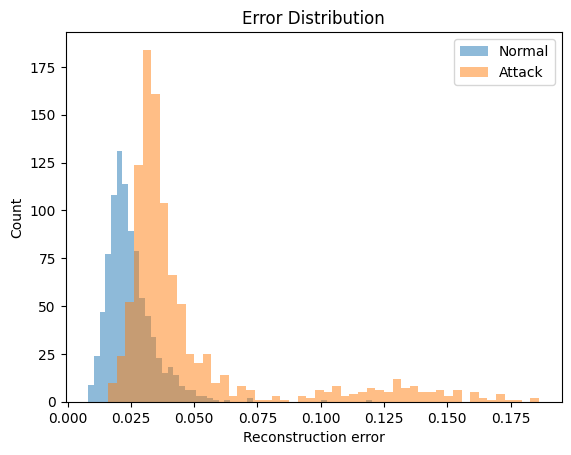

In [ ]:
# ============================================================
# caae_full.py ‚Äì  Conv-AAE end-to-end pipeline (A‚ÜíZ)
# ============================================================

import os, glob, itertools, cv2, numpy as np, pandas as pd, tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# 1) Hyper-parameters
# ------------------------------------------------------------
IMG_SHAPE   = (32, 32, 2)              # <-- ◊™◊û◊ï◊†◊™-◊ß◊ú◊ò
FEATURE_DIM = np.prod(IMG_SHAPE)       # 29*29*2
N_LABELS    = 2

BATCH       = 128
EPOCHS      = 50

LATENT_DIM  = 64
Œª_gp        = 10.0

LR_AE = 5e-4
LR_DZ = 1e-4
LR_DY = 1e-4
LR_G  = 5e-5

ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'           # layer / batch

# ------------------------------------------------------------
# 2) Pre-processing & TFRecord creation
# ------------------------------------------------------------
datasets = [
    "File_1_cleaned_Final.csv",
    "File_2_cleaned_Final.csv",
    "File_3_cleaned_Final.csv",
    "File_4_cleaned_Final.csv",
    "File_7_cleaned_Final.csv",
    "File_8_cleaned_Final.csv",
    "File_9_cleaned_Final.csv"
]
csv_map = {
    'File_1_cleaned_Final.csv': 'File_1_cleaned_Final.csv',
    'File_2_cleaned_Final.csv': 'File_2_cleaned_Final.csv',
    'File_3_cleaned_Final.csv': 'File_3_cleaned_Final.csv',
    'File_4_cleaned_Final.csv': 'File_4_cleaned_Final.csv',
    'File_7_cleaned_Final.csv': 'File_7_cleaned_Final.csv',
    'File_8_cleaned_Final.csv': 'File_8_cleaned_Final.csv',
    'File_9_cleaned_Final.csv': 'File_9_cleaned_Final.csv'
}


def fill_flag(row):
    if not isinstance(row['Label'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Label'])
    return row

def convert_canid_bits(cid):
    try:
        return np.array(list(map(int, bin(int(str(cid),16))[2:].zfill(29))), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try: return int(str(x).strip(), 16)
    except: return 0

# Replace the preprocess_windows function with this fixed version:
def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    cols = ['Timestamp','canID','DLC']+[f'Data{i}' for i in range(8)] + ['Label']
    df   = pd.read_csv(csv_file, header=None, names=cols, low_memory=False)

    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp','canID']).apply(fill_flag, axis=1)

    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)

    df['Label']    = df['Label'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Label'].values

    win = 29
    N   = len(bits_all)//win
    bits   = bits_all[:N*win].reshape(N, win, 29)
    data   = data_bytes[:N*win].reshape(N, win, 8)
    flags  = flags_all[:N*win].reshape(N, win)

    rows = []
    for i in range(N):
        id_block = bits[i]
        id_img   = cv2.resize(id_block.astype(np.uint8), (32, 32),
                              interpolation=cv2.INTER_NEAREST)

        last_b = data[i,-1,:]
        b8     = np.unpackbits(last_b).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (32, 32),
                              interpolation=cv2.INTER_NEAREST) > .5

        two_ch = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)  # 32x32x2
        rows.append((two_ch.flatten().tolist(), int(flags[i].any())))
    return rows


def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(.7*len(rows)); nvl = int(.15*len(rows))
    splits = {'train':rows[:ntr], 'val':rows[ntr:ntr+nvl], 'test':rows[ntr+nvl:]}
    for phase, chunk in splits.items():
        with tf.io.TFRecordWriter(f"{base}_{phase}.tfrecord") as w:
            for feat,lbl in chunk:
                ex = tf.train.Example(
                     features=tf.train.Features(feature={
                     'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                     'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))}))
                w.write(ex.SerializeToString())

# ◊¶◊ï◊® TFRecords ◊ê◊ù ◊ó◊°◊®◊ô◊ù

print("[DATA] Creating TFRecords‚Ä¶")
for d in datasets:
    if not os.path.exists(csv_map[d]): continue
    rows = preprocess_windows(csv_map[d])
    normals = [r for r in rows if r[1]==0]
    attacks = [r for r in rows if r[1]==1]
    write_tfrecord(normals, f"Normal_{d}")
    if attacks: write_tfrecord(attacks, d)

# ------------------------------------------------------------
# 3) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    fs = {'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
          'label':    tf.io.FixedLenFeature([1], tf.int64)}
    feat = tf.io.parse_single_example(proto, fs)
    x = tf.cast(feat['features'], tf.float32)
    x = tf.reshape(x, IMG_SHAPE)              # <-- ◊™◊û◊ï◊†◊î
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x,y: (x + tf.random.normal(tf.shape(x),0,0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
steps_per_epoch = sum(1 for _ in tf.data.TFRecordDataset(train_files)) // BATCH
print(f"[PIPE] records={steps_per_epoch*BATCH}, steps/epoch={steps_per_epoch}")

# ------------------------------------------------------------
# 4) CAAE Model
# ------------------------------------------------------------
def dense_block(units):
    layers = [tf.keras.layers.Dense(units)]
    if NORM_TYPE=='layer': layers.append(tf.keras.layers.LayerNormalization())
    elif NORM_TYPE=='batch': layers.append(tf.keras.layers.BatchNormalization())
    layers.append(tf.keras.layers.Activation(ACTIVATION))
    if DROPOUT>0: layers.append(tf.keras.layers.Dropout(DROPOUT))
    return tf.keras.Sequential(layers)

class ConvAAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # ---- encoder
        self.enc_c1  = tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_c2  = tf.keras.layers.Conv2D(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_flat= tf.keras.layers.Flatten()
        self.enc_fc  = dense_block(256)
        self.z_layer = tf.keras.layers.Dense(LATENT_DIM)
        self.y_logits= tf.keras.layers.Dense(N_LABELS)

        # ---- decoder
        self.dec_fc   = dense_block(8*8*64)
        self.dec_reshape = tf.keras.layers.Reshape((8,8,64))
        self.dec_t1  = tf.keras.layers.Conv2DTranspose(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_t2  = tf.keras.layers.Conv2DTranspose(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_out = tf.keras.layers.Conv2DTranspose(2,(3,3),padding='same',activation='sigmoid')

        # ---- discriminators (z , y)
        self.dz = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])
        self.dy = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])

    # ---------- forward passes ----------
    def encode(self, x):
        h = self.enc_c2(self.enc_c1(x))
        h = self.enc_fc(self.enc_flat(h))
        z = self.z_layer(h)
        logits = self.y_logits(h)
        y = tf.nn.softmax(logits)
        return z, y, logits

    def decode(self, z, y):
        h = tf.concat([z,y], axis=1)
        h = self.dec_fc(h)
        h = self.dec_reshape(h)
        h = self.dec_t2(self.dec_t1(h))
        return self.dec_out(h)

    def discriminate_z(self, z): return self.dz(z)
    def discriminate_y(self, y): return self.dy(y)

    @staticmethod
    def gp(f, real, fake):
        Œ± = tf.random.uniform([real.shape[0],1],0,1)
        inter = real + Œ±*(fake-real)
        with tf.GradientTape() as t:
            t.watch(inter); p=f(inter)
        g = t.gradient(p, inter)
        slopes = tf.sqrt(tf.reduce_sum(tf.square(g), axis=1)+1e-8)
        return tf.reduce_mean((slopes-1.)**2)

caae = ConvAAE()

# ------------------------------------------------------------
# 4.5) Warm-up: ◊ú◊ë◊†◊ï◊™ ◊ê◊™ ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊ú◊§◊†◊ô ◊î◊ê◊ï◊§◊ò◊ô◊û◊ô◊ñ◊®◊ô◊ù
# ------------------------------------------------------------
dummy_x = tf.zeros((1,) + IMG_SHAPE, dtype=tf.float32)
z0, y0, _ = caae.encode(dummy_x)
_ = caae.decode(z0, y0)
_ = caae.discriminate_z(tf.random.normal((1, LATENT_DIM)))
_ = caae.discriminate_y(tf.one_hot([0], depth=N_LABELS))
print("[BUILD] all layer variables created:", len(caae.trainable_variables))

# ------------------------------------------------------------
# 5) Losses & optimizers  (◊¢◊ù ◊®◊©◊ô◊û◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™)
# ------------------------------------------------------------
ae_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables +
    caae.dec_fc.trainable_variables + caae.dec_reshape.trainable_variables +
    caae.dec_t1.trainable_variables + caae.dec_t2.trainable_variables +
    caae.dec_out.trainable_variables
)
dz_vars = caae.dz.trainable_variables
dy_vars = caae.dy.trainable_variables
enc_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables
)

mse  = tf.keras.losses.MeanSquaredError()
ce   = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

# ------------------------------------------------------------
# 6) Training step (tf.function)
# ------------------------------------------------------------
@tf.function
def train_step(x_noisy, x_clean, y_lbl):
    # ---------- auto-encoder ----------
    with tf.GradientTape() as t_ae:
        z_enc, y_enc, _ = caae.encode(x_noisy)
        x_rec = caae.decode(z_enc, y_enc)
        loss_re = mse(x_clean, x_rec)
    grads = t_ae.gradient(loss_re, ae_vars)
    opt_ae.apply_gradients(zip(grads, ae_vars))

    # ---------- discriminator-z ----------
    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([tf.shape(x_noisy)[0], LATENT_DIM])
        dz_r   = caae.discriminate_z(z_real)
        dz_f   = caae.discriminate_z(z_enc)
        gp_z   = caae.gp(caae.discriminate_z, z_real, z_enc)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp_z
    opt_dz.apply_gradients(zip(t_dz.gradient(loss_dz, dz_vars), dz_vars))

    # ---------- discriminator-y ----------
    with tf.GradientTape() as t_dy:
        dy_r = caae.discriminate_y(y_lbl)
        _, y_enc2, _ = caae.encode(x_clean)
        dy_f = caae.discriminate_y(y_enc2)
        gp_y = caae.gp(caae.discriminate_y, y_lbl, y_enc2)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    opt_dy.apply_gradients(zip(t_dy.gradient(loss_dy, dy_vars), dy_vars))

    # ---------- generator / encoder adversarial ----------
    with tf.GradientTape() as t_g:
        z_g, y_g, logits = caae.encode(x_clean)
        loss_g = (
            -tf.reduce_mean(caae.discriminate_z(z_g))
            -tf.reduce_mean(caae.discriminate_y(y_g))
            + ce(y_lbl, logits)
        )
    opt_g.apply_gradients(zip(t_g.gradient(loss_g, enc_vars), enc_vars))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 7) Training loop
# ------------------------------------------------------------
re_hist, dz_hist, dy_hist, g_hist, val_hist = [],[],[],[],[]

for epoch in range(1, EPOCHS+1):
    print(f"\n[TRAIN] Epoch {epoch}/{EPOCHS}")
    ep_re=ep_dz=ep_dy=ep_g=0
    for step,(xn, xc, y) in enumerate(train_ds.take(steps_per_epoch)):
        lr,ldz,ldy,lg = train_step(xn, xc, y)
        ep_re+=lr.numpy(); ep_dz+=ldz.numpy(); ep_dy+=ldy.numpy(); ep_g+=lg.numpy()
        if step%100==0:
            print(f"  step {step}/{steps_per_epoch} | re={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} g={lg:.4f}")
    re_hist.append(ep_re/steps_per_epoch)
    dz_hist.append(ep_dz/steps_per_epoch)
    dy_hist.append(ep_dy/steps_per_epoch)
    g_hist .append(ep_g /steps_per_epoch)

    # -------- validation recon ----------
    val_loss, n_batches = 0,0
    for fn in glob.glob('Normal_*_val.tfrecord'):
        for x_val,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(BATCH):
            x_rec = caae.decode(*caae.encode(x_val)[0:2])
            val_loss += mse(x_val, x_rec).numpy()
            n_batches += 1
    val_hist.append(val_loss/n_batches)
    print(f"[VAL] recon={val_hist[-1]:.4f}")

# ------------------------------------------------------------
# 8) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

# --- Encoder
enc_in = Input(shape=IMG_SHAPE)
h = caae.enc_c2(caae.enc_c1(enc_in))
h = caae.enc_fc(caae.enc_flat(h))
z_out = caae.z_layer(h)
y_log = caae.y_logits(h)
y_out = Activation('softmax')(y_log)
encoder = Model(enc_in, [z_out,y_out], name='caae_encoder')

# --- Decoder
z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2   = caae.dec_fc(Concatenate()([z_in,y_in]))
h2   = caae.dec_reshape(h2)
h2   = caae.dec_t2(caae.dec_t1(h2))
dec_out = caae.dec_out(h2)
decoder = Model([z_in,y_in], dec_out, name='caae_decoder')

encoder.save('caae_encoder.keras')
decoder.save('caae_decoder.keras')
print("[SAVE] models stored")

# ------------------------------------------------------------
# 9) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    for x_batch,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(256):
        z_p,y_p = encoder(x_batch)
        x_r = decoder([z_p,y_p])
        e = tf.reduce_mean(tf.square(x_batch - x_r), axis=[1,2,3]).numpy()
        errs.append(e); ys.append(np.full(e.shape,label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr,tpr,ths = roc_curve(ys, errs)
roc_auc     = auc(fpr,tpr)
best_idx    = np.argmax(tpr-fpr)
thr_opt     = ths[best_idx]

print(f"\n[RESULT] ROC-AUC={roc_auc:.4f} | Thr={thr_opt:.6f} | "
      f"TPR={tpr[best_idx]:.3f} | FPR={fpr[best_idx]:.3f}")
cm = confusion_matrix(ys, (errs>thr_opt).astype(int))
print("[CM]\n", cm)
print("[Report]\n", classification_report(ys,(errs>thr_opt).astype(int),
                                          target_names=['Normal','Attack']))

# ------------------------------------------------------------
# 10) Plotting
# ------------------------------------------------------------
# -- Reconstruction loss curves
plt.figure(); plt.plot(re_hist,label='Train'); plt.plot(val_hist,label='Val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Reconstruction Loss'); plt.legend(); plt.show()

# -- Adversarial losses
plt.figure(); plt.plot(dz_hist,label='Disc-z'); plt.plot(dy_hist,label='Disc-y'); plt.plot(g_hist,label='Gen')
plt.xlabel('Epoch'); plt.ylabel('Wasserstein'); plt.title('Adversarial Losses'); plt.legend(); plt.show()

# -- ROC curve
plt.figure(); plt.plot(fpr,tpr,label=f'AUC={roc_auc:.3f}'); plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend(); plt.show()

# -- Confusion-matrix heat-map
plt.figure(); plt.imshow(cm,cmap=plt.cm.Blues); plt.title('Confusion Matrix'); plt.colorbar()
ticks = np.arange(2); classes=['Normal','Attack']
plt.xticks(ticks,classes,rotation=45); plt.yticks(ticks,classes)
th = cm.max()/2
for i,j in itertools.product(range(2),range(2)):
    plt.text(j,i,cm[i,j],ha='center',color='white' if cm[i,j]>th else 'black')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.tight_layout(); plt.show()

# -- Error distributions
plt.figure()
plt.hist(errs[ys==0],bins=50,alpha=.5,label='Normal')
plt.hist(errs[ys==1],bins=50,alpha=.5,label='Attack')
plt.xlabel('Reconstruction error'); plt.ylabel('Count')
plt.title('Error Distribution'); plt.legend(); plt.show()


# aae vs caee small-mid size of data set 50 epoch

[DATA] Creating TFRecords‚Ä¶
[DATA] Processing Attack_free_CHEVROLET_Spark_train.csv
[DATA] Processing Attack_free_KIA_Soul_train.csv
[DATA] Processing Flooding_CHEVROLET_Spark_train.csv
[DATA] Processing Flooding_KIA_Soul_train.csv
[DATA] Processing Fuzzy_CHEVROLET_Spark_train.csv
[DATA] Processing Attack_free_HY_Sonata_train.csv
[DATA] Processing Attack_free_KIA_Soul_train.csv
[DATA] Processing Fuzzy_dataset_HY_Sonata_train.csv
[DATA] Processing Fuzzy_dataset_KIA_Soul_train.csv
[DATA] Processing Malfunction_1st_dataset_HY_Sonata_train.csv
[DATA] Processing Malfunction_1st_dataset_KIA_Soul_train.csv
[DATA] Processing Malfunction_2nd_HY_Sonata_train.csv
[DATA] Processing Malfunction_2nd_KIA_Soul_train.csv
[DATA] Processing Replay_dataset_HY_Sonata_train.csv
[DATA] Processing Replay_dataset_KIA_Soul_train.csv
[PIPE] records=60160, steps/epoch=470
[BUILD] all layer variables created: 42

[TRAIN] Epoch 1/50
  step 0/470 | re=0.2548 dz=4.1040 dy=12.6625 g=-1.6933
  step 100/470 | re=0.0448

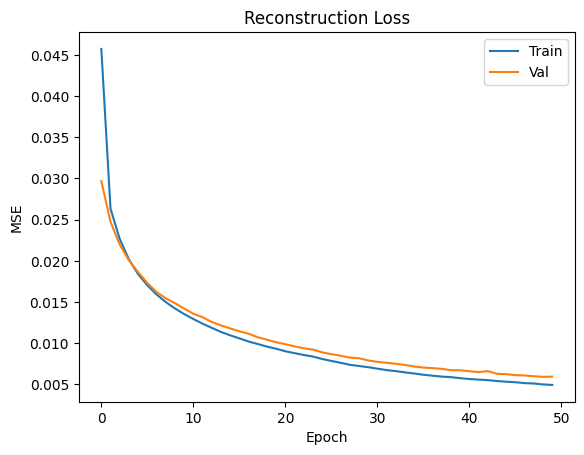

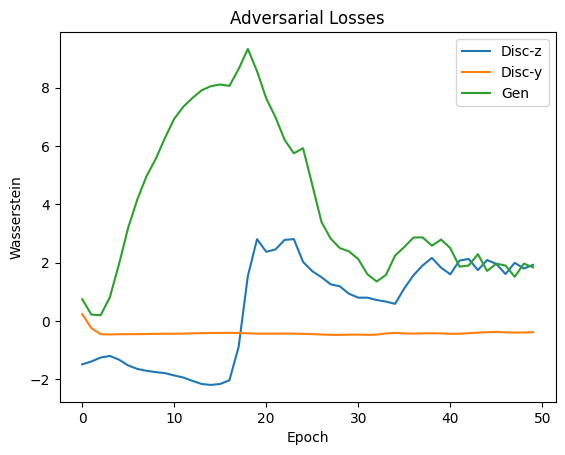

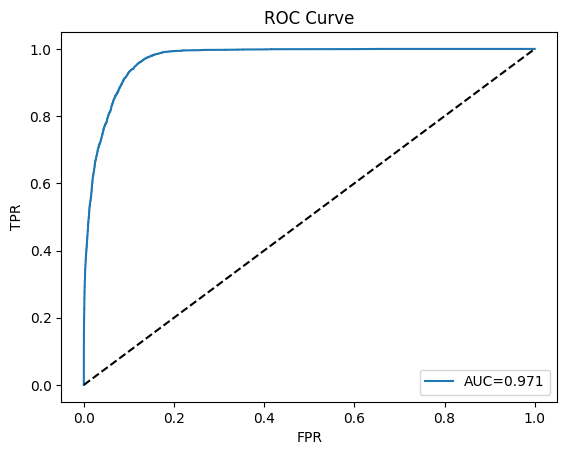

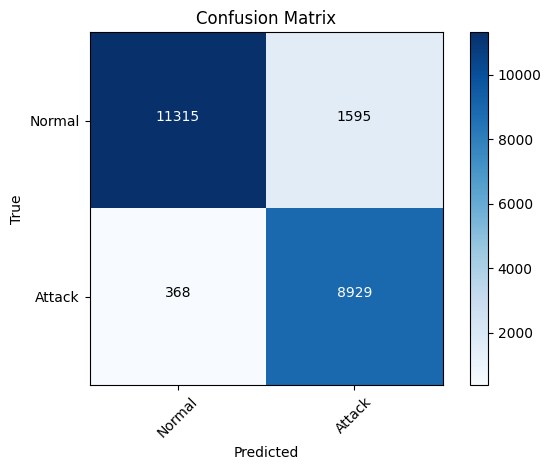

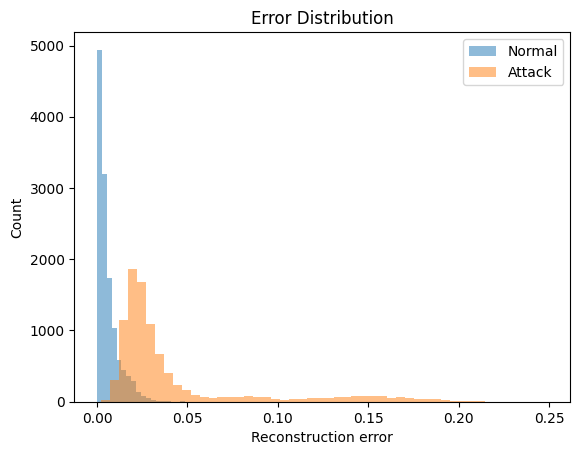

In [ ]:
# ============================================================
# caae_full.py ‚Äì  Conv-AAE end-to-end pipeline (A‚ÜíZ)
# ============================================================

import os, glob, itertools, cv2, numpy as np, pandas as pd, tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# 1) Hyper-parameters
# ------------------------------------------------------------
IMG_SHAPE   = (32, 32, 2)              # <-- ◊™◊û◊ï◊†◊™-◊ß◊ú◊ò
FEATURE_DIM = np.prod(IMG_SHAPE)       #
N_LABELS    = 2

BATCH       = 128
EPOCHS      = 50

LATENT_DIM  = 64
Œª_gp        = 10.0

LR_AE = 5e-4
LR_DZ = 1e-4
LR_DY = 1e-4
LR_G  = 5e-5

ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'           # layer / batch

# ------------------------------------------------------------
# 2) Pre-processing & TFRecord creation  (◊ú◊ú◊ê ◊©◊ô◊†◊ï◊ô ◊ú◊ï◊í◊ô)
# ------------------------------------------------------------
datasets = [
    "Attack_free_CHEVROLET_Spark_train.csv",
    "Attack_free_KIA_Soul_train.csv",
    "Flooding_CHEVROLET_Spark_train.csv",
    "Flooding_KIA_Soul_train.csv",
    "Fuzzy_CHEVROLET_Spark_train.csv",
    "Attack_free_HY_Sonata_train.csv",
    "Attack_free_KIA_Soul_train.csv",
    "Fuzzy_dataset_HY_Sonata_train.csv",
    "Fuzzy_dataset_KIA_Soul_train.csv",
    "Malfunction_1st_dataset_HY_Sonata_train.csv",
    "Malfunction_1st_dataset_KIA_Soul_train.csv",
    "Malfunction_2nd_HY_Sonata_train.csv",
    "Malfunction_2nd_KIA_Soul_train.csv",
    "Replay_dataset_HY_Sonata_train.csv",
    "Replay_dataset_KIA_Soul_train.csv"
]
csv_map = {d: d for d in datasets}



def fill_flag(row):
    if not isinstance(row['Label'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Label'])
    return row

def convert_canid_bits(cid):
    try:
        return np.array(list(map(int, bin(int(str(cid),16))[2:].zfill(29))), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try: return int(str(x).strip(), 16)
    except: return 0

# Replace the preprocess_windows function with this fixed version:
def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    cols = ['Timestamp','canID','DLC']+[f'Data{i}' for i in range(8)] + ['Label']
    df   = pd.read_csv(csv_file, header=None, names=cols, low_memory=False)

    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp','canID']).apply(fill_flag, axis=1)

    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)

    df['Label']    = df['Label'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Label'].values

    win = 29
    N   = len(bits_all)//win
    bits   = bits_all[:N*win].reshape(N, win, 29)
    data   = data_bytes[:N*win].reshape(N, win, 8)
    flags  = flags_all[:N*win].reshape(N, win)

    rows = []
    for i in range(N):
        id_block = bits[i]
        id_img   = cv2.resize(id_block.astype(np.uint8), (32, 32),
                              interpolation=cv2.INTER_NEAREST)

        last_b = data[i,-1,:]
        b8     = np.unpackbits(last_b).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (32, 32),
                              interpolation=cv2.INTER_NEAREST) > .5

        two_ch = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)  # 32x32x2
        rows.append((two_ch.flatten().tolist(), int(flags[i].any())))
    return rows


def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(.7*len(rows)); nvl = int(.15*len(rows))
    splits = {'train':rows[:ntr], 'val':rows[ntr:ntr+nvl], 'test':rows[ntr+nvl:]}
    for phase, chunk in splits.items():
        with tf.io.TFRecordWriter(f"{base}_{phase}.tfrecord") as w:
            for feat,lbl in chunk:
                ex = tf.train.Example(
                     features=tf.train.Features(feature={
                     'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                     'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))}))
                w.write(ex.SerializeToString())

# ◊¶◊ï◊® TFRecords ◊ê◊ù ◊ó◊°◊®◊ô◊ù

print("[DATA] Creating TFRecords‚Ä¶")
for d in datasets:
    if not os.path.exists(csv_map[d]): continue
    rows = preprocess_windows(csv_map[d])
    normals = [r for r in rows if r[1]==0]
    attacks = [r for r in rows if r[1]==1]
    write_tfrecord(normals, f"Normal_{d}")
    if attacks: write_tfrecord(attacks, d)

# ------------------------------------------------------------
# 3) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    fs = {'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
          'label':    tf.io.FixedLenFeature([1], tf.int64)}
    feat = tf.io.parse_single_example(proto, fs)
    x = tf.cast(feat['features'], tf.float32)
    x = tf.reshape(x, IMG_SHAPE)              # <-- ◊™◊û◊ï◊†◊î
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x,y: (x + tf.random.normal(tf.shape(x),0,0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
steps_per_epoch = sum(1 for _ in tf.data.TFRecordDataset(train_files)) // BATCH
print(f"[PIPE] records={steps_per_epoch*BATCH}, steps/epoch={steps_per_epoch}")

# ------------------------------------------------------------
# 4) CAAE Model
# ------------------------------------------------------------
def dense_block(units):
    layers = [tf.keras.layers.Dense(units)]
    if NORM_TYPE=='layer': layers.append(tf.keras.layers.LayerNormalization())
    elif NORM_TYPE=='batch': layers.append(tf.keras.layers.BatchNormalization())
    layers.append(tf.keras.layers.Activation(ACTIVATION))
    if DROPOUT>0: layers.append(tf.keras.layers.Dropout(DROPOUT))
    return tf.keras.Sequential(layers)

class ConvAAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # ---- encoder
        self.enc_c1  = tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_c2  = tf.keras.layers.Conv2D(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.enc_flat= tf.keras.layers.Flatten()
        self.enc_fc  = dense_block(256)
        self.z_layer = tf.keras.layers.Dense(LATENT_DIM)
        self.y_logits= tf.keras.layers.Dense(N_LABELS)

        # ---- decoder
        self.dec_fc   = dense_block(8*8*64)
        self.dec_reshape = tf.keras.layers.Reshape((8,8,64))
        self.dec_t1  = tf.keras.layers.Conv2DTranspose(64,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_t2  = tf.keras.layers.Conv2DTranspose(32,(3,3),strides=2,padding='same',activation=ACTIVATION)
        self.dec_out = tf.keras.layers.Conv2DTranspose(2,(3,3),padding='same',activation='sigmoid')

        # ---- discriminators (z , y)
        self.dz = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])
        self.dy = tf.keras.Sequential([dense_block(256),
                                       dense_block(128),
                                       tf.keras.layers.Dense(1)])

    # ---------- forward passes ----------
    def encode(self, x):
        h = self.enc_c2(self.enc_c1(x))
        h = self.enc_fc(self.enc_flat(h))
        z = self.z_layer(h)
        logits = self.y_logits(h)
        y = tf.nn.softmax(logits)
        return z, y, logits

    def decode(self, z, y):
        h = tf.concat([z,y], axis=1)
        h = self.dec_fc(h)
        h = self.dec_reshape(h)
        h = self.dec_t2(self.dec_t1(h))
        return self.dec_out(h)

    def discriminate_z(self, z): return self.dz(z)
    def discriminate_y(self, y): return self.dy(y)

    @staticmethod
    def gp(f, real, fake):
        Œ± = tf.random.uniform([real.shape[0],1],0,1)
        inter = real + Œ±*(fake-real)
        with tf.GradientTape() as t:
            t.watch(inter); p=f(inter)
        g = t.gradient(p, inter)
        slopes = tf.sqrt(tf.reduce_sum(tf.square(g), axis=1)+1e-8)
        return tf.reduce_mean((slopes-1.)**2)

caae = ConvAAE()

# ------------------------------------------------------------
# 4.5) Warm-up: ◊ú◊ë◊†◊ï◊™ ◊ê◊™ ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊ú◊§◊†◊ô ◊î◊ê◊ï◊§◊ò◊ô◊û◊ô◊ñ◊®◊ô◊ù
# ------------------------------------------------------------
dummy_x = tf.zeros((1,) + IMG_SHAPE, dtype=tf.float32)
z0, y0, _ = caae.encode(dummy_x)
_ = caae.decode(z0, y0)
_ = caae.discriminate_z(tf.random.normal((1, LATENT_DIM)))
_ = caae.discriminate_y(tf.one_hot([0], depth=N_LABELS))
print("[BUILD] all layer variables created:", len(caae.trainable_variables))

# ------------------------------------------------------------
# 5) Losses & optimizers  (◊¢◊ù ◊®◊©◊ô◊û◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™)
# ------------------------------------------------------------
ae_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables +
    caae.dec_fc.trainable_variables + caae.dec_reshape.trainable_variables +
    caae.dec_t1.trainable_variables + caae.dec_t2.trainable_variables +
    caae.dec_out.trainable_variables
)
dz_vars = caae.dz.trainable_variables
dy_vars = caae.dy.trainable_variables
enc_vars = (
    caae.enc_c1.trainable_variables + caae.enc_c2.trainable_variables +
    caae.enc_fc.trainable_variables + caae.z_layer.trainable_variables +
    caae.y_logits.trainable_variables
)

mse  = tf.keras.losses.MeanSquaredError()
ce   = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

# ------------------------------------------------------------
# 6) Training step (tf.function)
# ------------------------------------------------------------
@tf.function
def train_step(x_noisy, x_clean, y_lbl):
    # ---------- auto-encoder ----------
    with tf.GradientTape() as t_ae:
        z_enc, y_enc, _ = caae.encode(x_noisy)
        x_rec = caae.decode(z_enc, y_enc)
        loss_re = mse(x_clean, x_rec)
    grads = t_ae.gradient(loss_re, ae_vars)
    opt_ae.apply_gradients(zip(grads, ae_vars))

    # ---------- discriminator-z ----------
    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([tf.shape(x_noisy)[0], LATENT_DIM])
        dz_r   = caae.discriminate_z(z_real)
        dz_f   = caae.discriminate_z(z_enc)
        gp_z   = caae.gp(caae.discriminate_z, z_real, z_enc)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp_z
    opt_dz.apply_gradients(zip(t_dz.gradient(loss_dz, dz_vars), dz_vars))

    # ---------- discriminator-y ----------
    with tf.GradientTape() as t_dy:
        dy_r = caae.discriminate_y(y_lbl)
        _, y_enc2, _ = caae.encode(x_clean)
        dy_f = caae.discriminate_y(y_enc2)
        gp_y = caae.gp(caae.discriminate_y, y_lbl, y_enc2)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    opt_dy.apply_gradients(zip(t_dy.gradient(loss_dy, dy_vars), dy_vars))

    # ---------- generator / encoder adversarial ----------
    with tf.GradientTape() as t_g:
        z_g, y_g, logits = caae.encode(x_clean)
        loss_g = (
            -tf.reduce_mean(caae.discriminate_z(z_g))
            -tf.reduce_mean(caae.discriminate_y(y_g))
            + ce(y_lbl, logits)
        )
    opt_g.apply_gradients(zip(t_g.gradient(loss_g, enc_vars), enc_vars))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 7) Training loop
# ------------------------------------------------------------
re_hist, dz_hist, dy_hist, g_hist, val_hist = [],[],[],[],[]

for epoch in range(1, EPOCHS+1):
    print(f"\n[TRAIN] Epoch {epoch}/{EPOCHS}")
    ep_re=ep_dz=ep_dy=ep_g=0
    for step,(xn, xc, y) in enumerate(train_ds.take(steps_per_epoch)):
        lr,ldz,ldy,lg = train_step(xn, xc, y)
        ep_re+=lr.numpy(); ep_dz+=ldz.numpy(); ep_dy+=ldy.numpy(); ep_g+=lg.numpy()
        if step%100==0:
            print(f"  step {step}/{steps_per_epoch} | re={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} g={lg:.4f}")
    re_hist.append(ep_re/steps_per_epoch)
    dz_hist.append(ep_dz/steps_per_epoch)
    dy_hist.append(ep_dy/steps_per_epoch)
    g_hist .append(ep_g /steps_per_epoch)

    # -------- validation recon ----------
    val_loss, n_batches = 0,0
    for fn in glob.glob('Normal_*_val.tfrecord'):
        for x_val,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(BATCH):
            x_rec = caae.decode(*caae.encode(x_val)[0:2])
            val_loss += mse(x_val, x_rec).numpy()
            n_batches += 1
    val_hist.append(val_loss/n_batches)
    print(f"[VAL] recon={val_hist[-1]:.4f}")

# ------------------------------------------------------------
# 8) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

# --- Encoder
enc_in = Input(shape=IMG_SHAPE)
h = caae.enc_c2(caae.enc_c1(enc_in))
h = caae.enc_fc(caae.enc_flat(h))
z_out = caae.z_layer(h)
y_log = caae.y_logits(h)
y_out = Activation('softmax')(y_log)
encoder = Model(enc_in, [z_out,y_out], name='caae_encoder')

# --- Decoder
z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2   = caae.dec_fc(Concatenate()([z_in,y_in]))
h2   = caae.dec_reshape(h2)
h2   = caae.dec_t2(caae.dec_t1(h2))
dec_out = caae.dec_out(h2)
decoder = Model([z_in,y_in], dec_out, name='caae_decoder')

encoder.save('caae_encoder.keras')
decoder.save('caae_decoder.keras')
print("[SAVE] models stored")

# ------------------------------------------------------------
# 9) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    for x_batch,_ in tf.data.TFRecordDataset(fn).map(parse_feat).batch(256):
        z_p,y_p = encoder(x_batch)
        x_r = decoder([z_p,y_p])
        e = tf.reduce_mean(tf.square(x_batch - x_r), axis=[1,2,3]).numpy()
        errs.append(e); ys.append(np.full(e.shape,label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr,tpr,ths = roc_curve(ys, errs)
roc_auc     = auc(fpr,tpr)
best_idx    = np.argmax(tpr-fpr)
thr_opt     = ths[best_idx]

print(f"\n[RESULT] ROC-AUC={roc_auc:.4f} | Thr={thr_opt:.6f} | "
      f"TPR={tpr[best_idx]:.3f} | FPR={fpr[best_idx]:.3f}")
cm = confusion_matrix(ys, (errs>thr_opt).astype(int))
print("[CM]\n", cm)
print("[Report]\n", classification_report(ys,(errs>thr_opt).astype(int),
                                          target_names=['Normal','Attack']))

# ------------------------------------------------------------
# 10) Plotting
# ------------------------------------------------------------
# -- Reconstruction loss curves
plt.figure(); plt.plot(re_hist,label='Train'); plt.plot(val_hist,label='Val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Reconstruction Loss'); plt.legend(); plt.show()

# -- Adversarial losses
plt.figure(); plt.plot(dz_hist,label='Disc-z'); plt.plot(dy_hist,label='Disc-y'); plt.plot(g_hist,label='Gen')
plt.xlabel('Epoch'); plt.ylabel('Wasserstein'); plt.title('Adversarial Losses'); plt.legend(); plt.show()

# -- ROC curve
plt.figure(); plt.plot(fpr,tpr,label=f'AUC={roc_auc:.3f}'); plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend(); plt.show()

# -- Confusion-matrix heat-map
plt.figure(); plt.imshow(cm,cmap=plt.cm.Blues); plt.title('Confusion Matrix'); plt.colorbar()
ticks = np.arange(2); classes=['Normal','Attack']
plt.xticks(ticks,classes,rotation=45); plt.yticks(ticks,classes)
th = cm.max()/2
for i,j in itertools.product(range(2),range(2)):
    plt.text(j,i,cm[i,j],ha='center',color='white' if cm[i,j]>th else 'black')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.tight_layout(); plt.show()

# -- Error distributions
plt.figure()
plt.hist(errs[ys==0],bins=50,alpha=.5,label='Normal')
plt.hist(errs[ys==1],bins=50,alpha=.5,label='Attack')
plt.xlabel('Reconstruction error'); plt.ylabel('Count')
plt.title('Error Distribution'); plt.legend(); plt.show()


[DATA] TFRecords missing, preprocessing...
[DATA] Processing Attack_free_CHEVROLET_Spark_train.csv
[DATA] Processing Attack_free_KIA_Soul_train.csv
[DATA] Processing Flooding_CHEVROLET_Spark_train.csv
[DATA] Processing Flooding_KIA_Soul_train.csv
[DATA] Processing Fuzzy_CHEVROLET_Spark_train.csv
[DATA] Processing Attack_free_HY_Sonata_train.csv
[DATA] Processing Attack_free_KIA_Soul_train.csv
[DATA] Processing Fuzzy_dataset_HY_Sonata_train.csv
[DATA] Processing Fuzzy_dataset_KIA_Soul_train.csv
[DATA] Processing Malfunction_1st_dataset_HY_Sonata_train.csv
[DATA] Processing Malfunction_1st_dataset_KIA_Soul_train.csv
[DATA] Processing Malfunction_2nd_HY_Sonata_train.csv
[DATA] Processing Malfunction_2nd_KIA_Soul_train.csv
[DATA] Processing Replay_dataset_HY_Sonata_train.csv
[DATA] Processing Replay_dataset_KIA_Soul_train.csv
[PIPE] Total records: 64814, steps/epoch: 506
[TRAIN] Epoch 1/30
 step 0/506 | recon=0.2747 dz=1.9162 dy=4.0835 gen=0.5807
 step 100/506 | recon=0.0583 dz=-4.3568 dy=

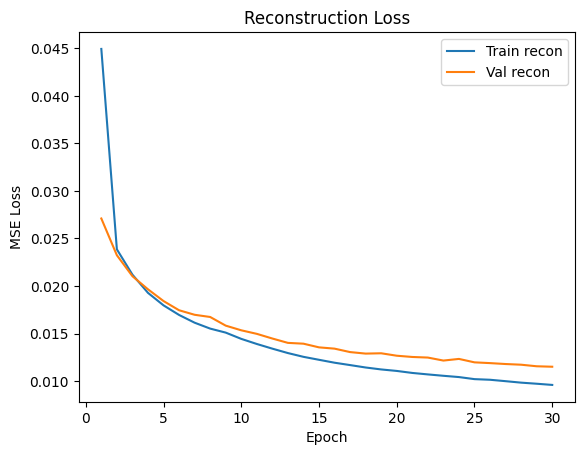

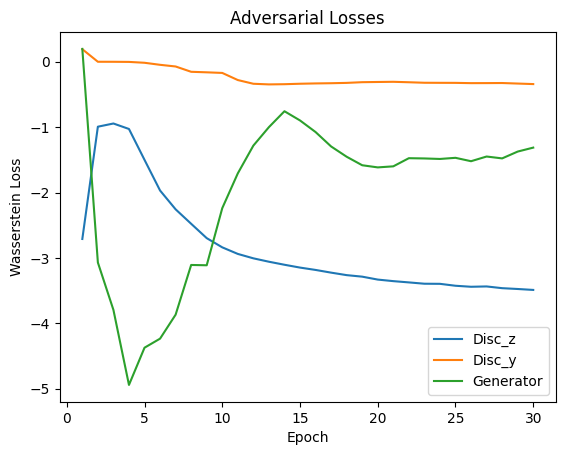

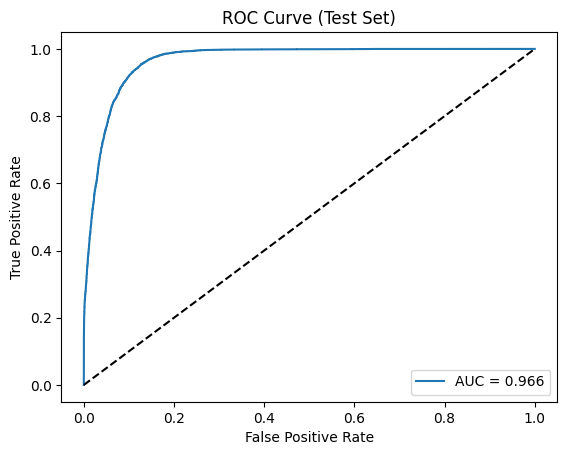

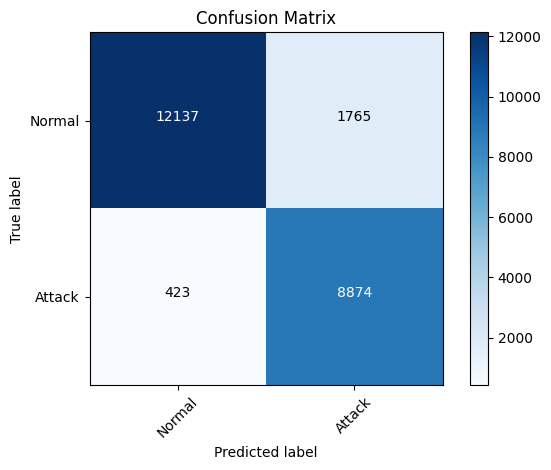

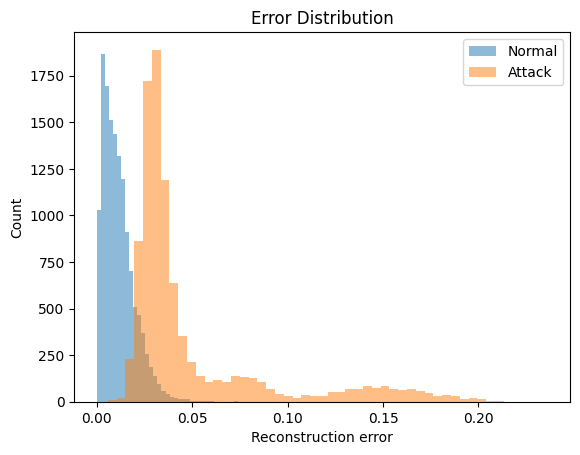

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

# ------------------------------------------------------------
# 0) GPU setup (optional)
# ------------------------------------------------------------
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ------------------------------------------------------------
# Hyperparameters
# ------------------------------------------------------------
FEATURE_DIM = 29 * 29 * 2
N_LABELS   = 2
BATCH      = 128
EPOCHS     = 30

# AAE-specific
N_L1       = 1024
N_L2       = 768
LATENT_DIM = 64
Œª_gp       = 10.0

# Learning rates
LR_AE = 0.0005
LR_DZ = 0.0001
LR_DY = 0.0001
LR_G  = 5e-5

# Architecture options
ACTIVATION = 'elu'
DROPOUT    = 0.2
NORM_TYPE  = 'layer'  # 'layer' or 'batch'

# ------------------------------------------------------------
# 1) Helper functions: preprocessing & TFRecord creation
# ------------------------------------------------------------
datasets = [
    "Attack_free_CHEVROLET_Spark_train.csv",
    "Attack_free_KIA_Soul_train.csv",
    "Flooding_CHEVROLET_Spark_train.csv",
    "Flooding_KIA_Soul_train.csv",
    "Fuzzy_CHEVROLET_Spark_train.csv",
    "Attack_free_HY_Sonata_train.csv",
    "Attack_free_KIA_Soul_train.csv",
    "Fuzzy_dataset_HY_Sonata_train.csv",
    "Fuzzy_dataset_KIA_Soul_train.csv",
    "Malfunction_1st_dataset_HY_Sonata_train.csv",
    "Malfunction_1st_dataset_KIA_Soul_train.csv",
    "Malfunction_2nd_HY_Sonata_train.csv",
    "Malfunction_2nd_KIA_Soul_train.csv",
    "Replay_dataset_HY_Sonata_train.csv",
    "Replay_dataset_KIA_Soul_train.csv"
]
csv_map = {d: d for d in datasets}

def fill_flag(row):
    if not isinstance(row['Flag'], str):
        col = 'Data' + str(int(row['DLC']))
        row['Flag'] = row.get(col, row['Flag'])
    return row

def convert_canid_bits(cid):
    try:
        b = bin(int(str(cid), 16))[2:].zfill(29)
        return np.array(list(map(int, b)), dtype=np.uint8)
    except:
        return np.zeros(29, dtype=np.uint8)

def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)
    except:
        return 0

def preprocess_windows(csv_file):
    print(f"[DATA] Processing {csv_file}")
    attrs = ['Timestamp', 'canID', 'DLC'] + [f'Data{i}' for i in range(8)] + ['Flag']
    df = pd.read_csv(csv_file, header=None, names=attrs, low_memory=False)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['DLC']       = pd.to_numeric(df['DLC'], errors='coerce').fillna(0).astype(int)
    df = df.dropna(subset=['Timestamp', 'canID']).apply(fill_flag, axis=1)
    for i in range(8):
        df[f'Data{i}'] = df[f'Data{i}'].apply(hex_to_int).astype(np.uint8)
    df['Flag']    = df['Flag'].astype(str).str.upper().eq('T').astype(np.uint8)
    df['canBits'] = df['canID'].apply(convert_canid_bits)
    df = df.sort_values('Timestamp')

    bits_all   = np.stack(df['canBits'].values)
    data_bytes = df[[f'Data{i}' for i in range(8)]].values
    flags_all  = df['Flag'].values

    win = 29
    N   = len(bits_all) // win
    bits   = bits_all[:N * win].reshape(N, win, 29)
    data   = data_bytes[:N * win].reshape(N, win, 8)
    flags  = flags_all[:N * win].reshape(N, win)

    rows = []
    for i in range(N):
        id_img   = bits[i].astype(np.uint8)
        last_b   = data[i, -1, :]
        b8       = np.unpackbits(last_b, axis=0).reshape(8,8)
        data_img = cv2.resize(b8.astype(np.float32), (29,29), interpolation=cv2.INTER_NEAREST) > 0.5
        two_ch   = np.stack([id_img, data_img.astype(np.uint8)], axis=-1)
        feat_int = two_ch.flatten().tolist()
        lbl      = int(flags[i].any())
        rows.append((feat_int, lbl))
    return rows

def write_tfrecord(rows, base):
    np.random.shuffle(rows)
    ntr = int(0.7 * len(rows))
    nvl = int(0.15 * len(rows))
    splits = {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+ntr+nvl:]} if False else {'train': rows[:ntr], 'val': rows[ntr:ntr+nvl], 'test': rows[ntr+nvl:]}
    for ph, ch in splits.items():
        fn = f"{base}_{ph}.tfrecord"
        with tf.io.TFRecordWriter(fn) as writer:
            for feat, lbl in ch:
                ex = tf.train.Example(features=tf.train.Features(feature={
                    'features': tf.train.Feature(int64_list=tf.train.Int64List(value=feat)),
                    'label':    tf.train.Feature(int64_list=tf.train.Int64List(value=[lbl]))
                }))
                writer.write(ex.SerializeToString())

# Create/check TFRecords
expected = []
for a in datasets:
    for ph in ('train', 'val', 'test'):
        expected.append(f"{a}_{ph}.tfrecord")
        if a != 'parsed_dataset':
            expected.append(f"Normal_{a}_{ph}.tfrecord")
if not all(os.path.exists(f) for f in expected):
    print("[DATA] TFRecords missing, preprocessing...")
    for a in datasets:
        src = csv_map[a]
        if not os.path.exists(src):
            print(f"[WARN] {src} not found")
        else:
            rows    = preprocess_windows(src)
            normals = [r for r in rows if r[1] == 0]
            attacks = [r for r in rows if r[1] == 1]
            write_tfrecord(normals, f"Normal_{a}")
            if attacks:
                write_tfrecord(attacks, a)
else:
    print("[DATA] All TFRecords found.")

# ------------------------------------------------------------
# 2) tf.data pipeline
# ------------------------------------------------------------
def parse_feat(proto):
    feat = tf.io.parse_single_example(proto, {
        'features': tf.io.FixedLenFeature([FEATURE_DIM], tf.int64),
        'label':    tf.io.FixedLenFeature([1], tf.int64)
    })
    x = tf.cast(feat['features'], tf.float32)
    y = tf.one_hot(tf.cast(feat['label'][0], tf.int32), N_LABELS)
    return x, y

train_files = glob.glob('Normal_*_train.tfrecord')
train_ds = (
    tf.data.TFRecordDataset(train_files, num_parallel_reads=tf.data.AUTOTUNE)
    .map(parse_feat, tf.data.AUTOTUNE)
    .map(lambda x, y: (x + tf.random.normal(tf.shape(x), 0, 0.01), x, y), tf.data.AUTOTUNE)
    .shuffle(10000).repeat()
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)
)
total = sum(1 for _ in tf.data.TFRecordDataset(train_files))
steps_per_epoch = total // BATCH
print(f"[PIPE] Total records: {total}, steps/epoch: {steps_per_epoch}")

# ------------------------------------------------------------
# 3) AAE Model definition
# ------------------------------------------------------------
class AAE(tf.keras.Model):
    def __init__(self):
        super().__init__()
        def dense_block(units):
            layers = [tf.keras.layers.Dense(units)]
            if NORM_TYPE == 'layer': layers.append(tf.keras.layers.LayerNormalization())
            elif NORM_TYPE == 'batch': layers.append(tf.keras.layers.BatchNormalization())
            layers.append(tf.keras.layers.Activation(ACTIVATION))
            if DROPOUT > 0: layers.append(tf.keras.layers.Dropout(DROPOUT))
            return tf.keras.Sequential(layers)

        self.e1   = dense_block(N_L1)
        self.e2   = dense_block(N_L2)
        self.ez   = tf.keras.layers.Dense(LATENT_DIM)
        self.ey   = tf.keras.layers.Dense(N_LABELS)

        self.d1   = dense_block(N_L2)
        self.d2   = dense_block(N_L1)
        self.dout = tf.keras.layers.Dense(FEATURE_DIM, activation='sigmoid')

        self.dz1  = dense_block(N_L1)
        self.dz2  = dense_block(N_L2)
        self.dzout= tf.keras.layers.Dense(1)

        self.dy1  = dense_block(N_L1)
        self.dy2  = dense_block(N_L2)
        self.dyout= tf.keras.layers.Dense(1)

    def encode(self, x):
        h      = self.e2(self.e1(x))
        z      = self.ez(h)
        logits = self.ey(h)
        return z, tf.nn.softmax(logits), logits

    def decode(self, z, y):
        h = tf.concat([z, y], axis=1)
        h = self.d1(h)
        h = self.d2(h)
        return self.dout(h)

    def discriminate_z(self, z):
        h = self.dz1(z)
        h = self.dz2(h)
        return self.dzout(h)

    def discriminate_y(self, y):
        h = self.dy1(y)
        h = self.dy2(h)
        return self.dyout(h)

    def gradient_penalty(self, f, real, fake):
        alpha = tf.random.uniform([real.shape[0], 1], 0, 1)
        interm = real + alpha * (fake - real)
        with tf.GradientTape() as tape:
            tape.watch(interm)
            pred = f(interm)
        grads = tape.gradient(pred, interm)
        slopes= tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((slopes - 1)**2)

aae = AAE()

# ------------------------------------------------------------
# 4) Losses & Optimizers
# ------------------------------------------------------------
mse    = tf.keras.losses.MeanSquaredError()
ce     = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
opt_ae = tf.keras.optimizers.Adam(LR_AE)
opt_dz = tf.keras.optimizers.Adam(LR_DZ)
opt_dy = tf.keras.optimizers.Adam(LR_DY)
opt_g  = tf.keras.optimizers.Adam(LR_G)

# Lists to track losses
train_re_losses = []
val_re_losses   = []
train_dz_losses = []
train_dy_losses = []
train_g_losses  = []

@tf.function
def train_step(xn, xc, y):
    with tf.GradientTape() as t_ae:
        z, yp, logits = aae.encode(xn)
        xr = aae.decode(z, yp)
        loss_re = mse(xc, xr)
    vars_ae = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables + aae.d1.trainable_variables + aae.d2.trainable_variables + aae.dout.trainable_variables
    grads_ae = t_ae.gradient(loss_re, vars_ae)
    opt_ae.apply_gradients(zip(grads_ae, vars_ae))

    with tf.GradientTape() as t_dz:
        z_real = tf.random.normal([xn.shape[0], LATENT_DIM])
        dz_r = aae.discriminate_z(z_real)
        dz_f = aae.discriminate_z(z)
        gp   = aae.gradient_penalty(aae.discriminate_z, z_real, z)
        loss_dz = tf.reduce_mean(dz_f) - tf.reduce_mean(dz_r) + Œª_gp * gp
    vars_dz = aae.dz1.trainable_variables + aae.dz2.trainable_variables + aae.dzout.trainable_variables
    grads_dz = t_dz.gradient(loss_dz, vars_dz)
    opt_dz.apply_gradients(zip(grads_dz, vars_dz))

    with tf.GradientTape() as t_dy:
        dy_r = aae.discriminate_y(y)
        _, yp_enc, _ = aae.encode(xc)
        dy_f = aae.discriminate_y(yp_enc)
        gp_y = aae.gradient_penalty(aae.discriminate_y, y, yp_enc)
        loss_dy = tf.reduce_mean(dy_f) - tf.reduce_mean(dy_r) + Œª_gp * gp_y
    vars_dy = aae.dy1.trainable_variables + aae.dy2.trainable_variables + aae.dyout.trainable_variables
    grads_dy = t_dy.gradient(loss_dy, vars_dy)
    opt_dy.apply_gradients(zip(grads_dy, vars_dy))

    with tf.GradientTape() as t_g:
        z_enc, y_enc, logits_enc = aae.encode(xc)
        loss_g = -tf.reduce_mean(aae.discriminate_z(z_enc))
        loss_g += -tf.reduce_mean(aae.discriminate_y(y_enc))
        loss_g += ce(y, logits_enc)
    vars_g = aae.e1.trainable_variables + aae.e2.trainable_variables + aae.ez.trainable_variables + aae.ey.trainable_variables
    grads_g = t_g.gradient(loss_g, vars_g)
    opt_g.apply_gradients(zip(grads_g, vars_g))

    return loss_re, loss_dz, loss_dy, loss_g

# ------------------------------------------------------------
# 5) Training loop
# ------------------------------------------------------------
for epoch in range(1, EPOCHS + 1):
    print(f"[TRAIN] Epoch {epoch}/{EPOCHS}")
    epoch_re, epoch_dz, epoch_dy, epoch_g = 0, 0, 0, 0
    it = iter(train_ds)
    for step in range(steps_per_epoch):
        xn, xc, y = next(it)
        lr, ldz, ldy, lg = train_step(xn, xc, y)
        epoch_re  += lr.numpy()
        epoch_dz += ldz.numpy()
        epoch_dy += ldy.numpy()
        epoch_g  += lg.numpy()
        if step % 100 == 0:
            print(f" step {step}/{steps_per_epoch} | recon={lr:.4f} dz={ldz:.4f} dy={ldy:.4f} gen={lg:.4f}")

    # average losses
    train_re_losses.append(epoch_re/steps_per_epoch)
    train_dz_losses.append(epoch_dz/steps_per_epoch)
    train_dy_losses.append(epoch_dy/steps_per_epoch)
    train_g_losses.append(epoch_g/steps_per_epoch)

    # validation recon loss
    val_loss, val_steps = 0, 0
    val_files = glob.glob('Normal_*_val.tfrecord')
    for fn in val_files:
        ds_val = tf.data.TFRecordDataset(fn).map(parse_feat).batch(BATCH)
        for x_val, _ in ds_val:
            _, yp, _ = aae.encode(x_val + tf.random.normal(tf.shape(x_val),0,0.01))
            x_rec = aae.decode(*aae.encode(x_val)[0:2])
            val_loss += tf.reduce_mean(mse(x_val, x_rec)).numpy()
            val_steps += 1
    val_re_losses.append(val_loss/val_steps)
    print(f"[VALID] recon={val_re_losses[-1]:.4f}")

# ------------------------------------------------------------
# 6) Save encoder & decoder
# ------------------------------------------------------------
from tensorflow.keras.layers import Input, Activation, Concatenate
from tensorflow.keras.models import Model

enc_in = Input(shape=(FEATURE_DIM,))
h = aae.e2(aae.e1(enc_in))
z_enc = aae.ez(h)
y_logits = aae.ey(h)
y_enc = Activation('softmax')(y_logits)
encoder = Model(enc_in, [z_enc, y_enc], name='aae_encoder')

z_in = Input(shape=(LATENT_DIM,))
y_in = Input(shape=(N_LABELS,))
h2 = aae.d2(aae.d1(Concatenate()([z_in, y_in])))
dec_out = aae.dout(h2)
decoder = Model([z_in, y_in], dec_out, name='aae_decoder')

encoder.save('aae_encoder.keras')
decoder.save('aae_decoder.keras')
print("[SAVE] Encoder & decoder saved")

# ------------------------------------------------------------
# 7) Evaluation
# ------------------------------------------------------------
errs, ys = [], []
for fn in glob.glob('*_test.tfrecord'):
    label = 0 if fn.startswith('Normal_') else 1
    ds_eval = tf.data.TFRecordDataset(fn).map(parse_feat).batch(256)
    for x_batch, _ in ds_eval:
        z_p, y_p = encoder(x_batch)
        x_r = decoder([z_p, y_p])
        e = tf.reduce_mean((x_batch - x_r)**2, axis=1).numpy()
        errs.append(e)
        ys.append(np.full(e.shape, label))
errs = np.concatenate(errs)
ys   = np.concatenate(ys)

fpr, tpr, ths = roc_curve(ys, errs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thr = ths[opt_idx]

print(f"[RESULT] ROC AUC: {roc_auc:.4f}, Thr: {opt_thr:.6f}, TPR: {tpr[opt_idx]:.3f}, FPR: {fpr[opt_idx]:.3f}")
print("[RESULT] Confusion Matrix:")
cm = confusion_matrix(ys, (errs > opt_thr).astype(int))
print(cm)
print("[RESULT] Classification Report:")
print(classification_report(ys, (errs > opt_thr).astype(int), target_names=['Normal','Attack']))

# ------------------------------------------------------------
# 8) Plotting
# ------------------------------------------------------------
# Reconstruction loss curves
plt.figure()
plt.plot(range(1, EPOCHS+1), train_re_losses, label='Train recon')
plt.plot(range(1, EPOCHS+1), val_re_losses,   label='Val recon')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Reconstruction Loss')
plt.legend()
plt.show()

# Adversarial losses
plt.figure()
plt.plot(range(1, EPOCHS+1), train_dz_losses, label='Disc_z')
plt.plot(range(1, EPOCHS+1), train_dy_losses, label='Disc_y')
plt.plot(range(1, EPOCHS+1), train_g_losses,  label='Generator')
plt.xlabel('Epoch')
plt.ylabel('Wasserstein Loss')
plt.title('Adversarial Losses')
plt.legend()
plt.show()

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend()
plt.show()

# Confusion matrix heatmap
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Normal','Attack']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Error distribution histogram
plt.figure()
plt.hist(errs[ys==0], bins=50, alpha=0.5, label='Normal')
plt.hist(errs[ys==1], bins=50, alpha=0.5, label='Attack')
plt.xlabel('Reconstruction error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.legend()
plt.show()
